# **Flight Price Prediction**



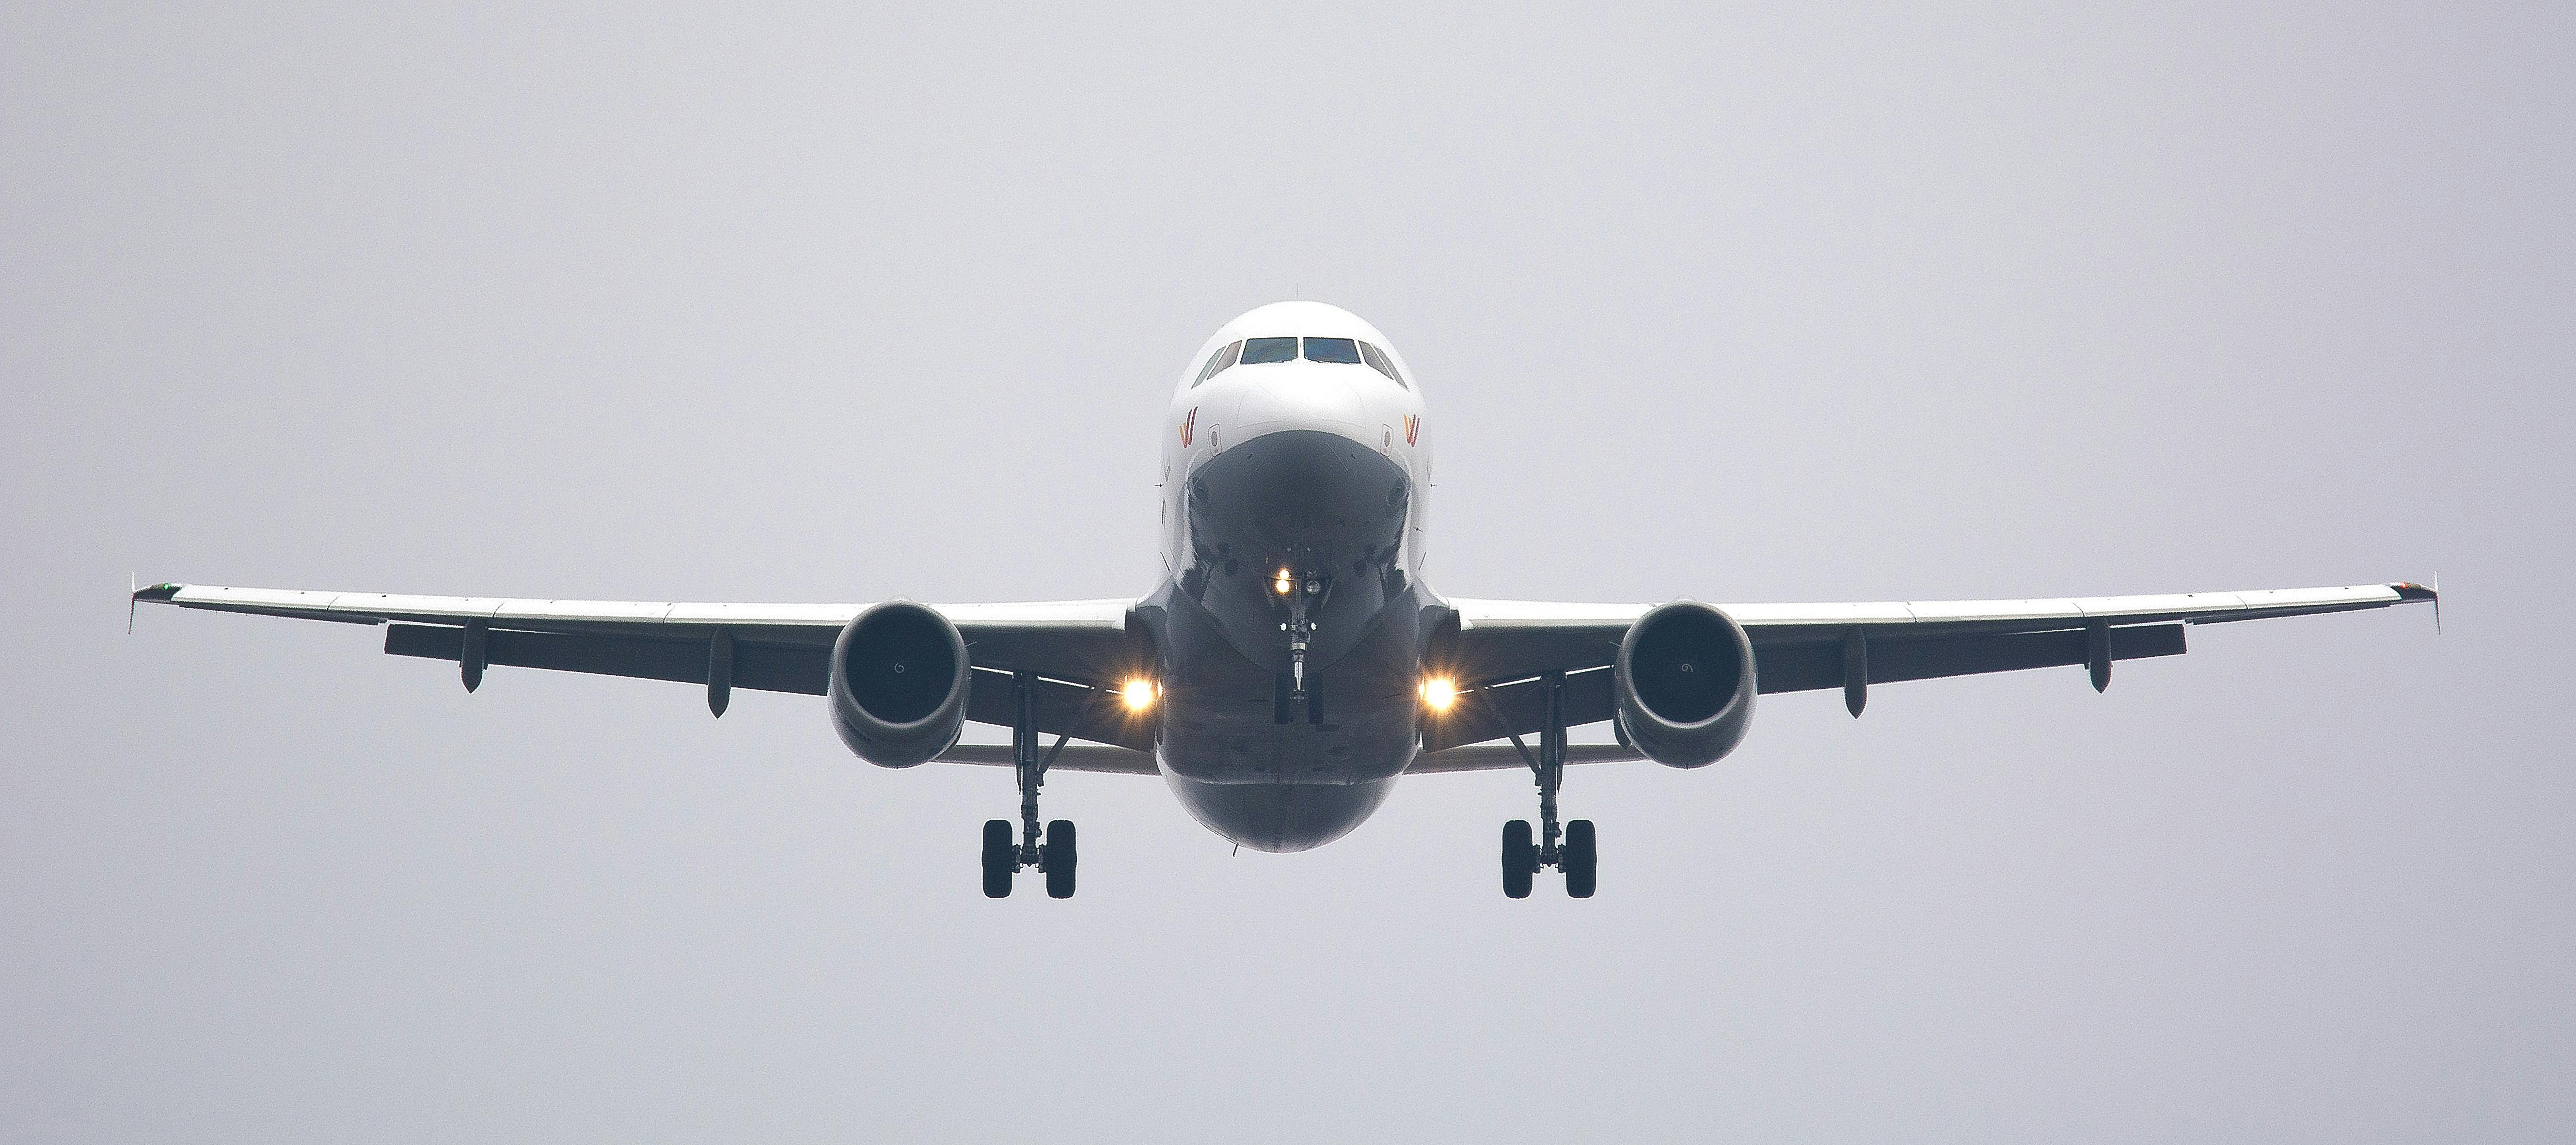

In [60]:
from IPython.display import Image, display

# Specify the image path
img_path = '/kaggle/input/airport22/pexels-pixabay-358319.jpg'

# Display the image and control its size
display(Image(filename=img_path, width=1100, height=200))  # You can adjust width and height as needed

# **Story Telling**

**Once upon a time, in the bustling world of travel, where endless queues and complicated booking processes were the norm, three brothers had a vision to revolutionize the way people planned their trips. This vision became EaseMyTrip, a company born from the desire to make travel seamless, affordable and convenient for everyone,EaseMyTrip, founded in 2008 by the three brothers - Nishant, Rekant and Prashant Bitti - has emerged as one of the pioneers in the travel industry through its commitment to transparency and eliminating additional booking fees. Started as a startup, the company quickly gained popularity for offering seamless and affordable travel bookings expanded its services to include flights, hotels, buses, and trains , As the company grew, it went global, achieving significant milestones like a stock exchange listing while maintaining its core values of honesty and affordability. Today, EaseMyTrip is a leading travel platform known for making travel easy and stress-free.**




# **Features** 


*  **Airline**: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

*  **Flight**: Flight stores information regarding the plane's flight code. It is a categorical feature.

*  **Source City**: City from which the flight takes off. It is a categorical feature having 6 unique cities.

*  **Departure Time**: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

*  **Stops**: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

*  **Arrival Time**: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

*  **Destination City**: City where the flight will land. It is a categorical feature having 6 unique cities.

*  **Class**: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

*  **Duration**: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

* **Days Left**: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

*  **Price**: Target variable stores information of the ticket price.

# **Import Libraries** 

In [61]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
import os
plt.style.use('ggplot')

warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))





/kaggle/input/flight-price-prediction/business.csv
/kaggle/input/flight-price-prediction/economy.csv
/kaggle/input/flight-price-prediction/Clean_Dataset.csv
/kaggle/input/airport22/pexels-pixabay-358319.jpg


# **Read csv flle**

In [62]:
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")

# **EDA**

In [63]:
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [64]:
df.tail()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [65]:
df.sample(10)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
266929,266929,Vistara,UK-778,Kolkata,Afternoon,one,Night,Mumbai,Business,7.50,43,70431
37474,37474,Air_India,AI-542,Delhi,Morning,one,Early_Morning,Chennai,Economy,22.25,17,3726
201679,201679,Vistara,UK-834,Chennai,Evening,one,Evening,Kolkata,Economy,26.42,40,5975
104364,104364,GO_FIRST,G8-399,Bangalore,Night,one,Early_Morning,Kolkata,Economy,9.50,14,5177
70702,70702,Air_India,AI-631,Mumbai,Evening,two_or_more,Night,Hyderabad,Economy,28.25,4,11617
163039,163039,Indigo,6E-5207,Hyderabad,Morning,zero,Morning,Mumbai,Economy,1.58,33,3096
124219,124219,GO_FIRST,G8-295,Kolkata,Early_Morning,one,Evening,Delhi,Economy,12.00,30,6294
209743,209743,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,30,22152
170354,170354,Air_India,AI-541,Hyderabad,Evening,one,Night,Bangalore,Economy,7.67,46,6314
50818,50818,SpiceJet,SG-276,Mumbai,Early_Morning,one,Morning,Delhi,Economy,4.75,40,3342


In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [67]:
df.describe()


,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [68]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [69]:
df.duplicated().sum()


0

In [70]:
df.shape


(300153, 12)

In [71]:
df.drop('Unnamed: 0',axis = 1 , inplace = True)


In [72]:
df.nunique()


airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

*  **Features Analysis**

In [73]:
df['price'].describe()


count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

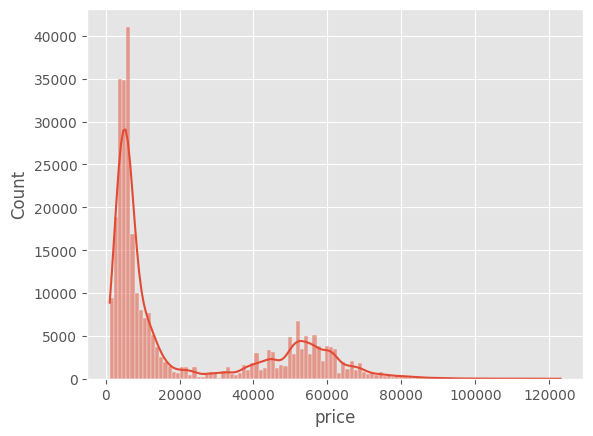

In [74]:
sns.histplot(data=df['price'] ,kde=True)


* **Our target variable has a right skewness**.

* **Most of our price values in a range of 1000-40000.& we can predict that these values contains alot of Economy class ,little of Businesss class.**

In [75]:
df['airline'].value_counts()


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

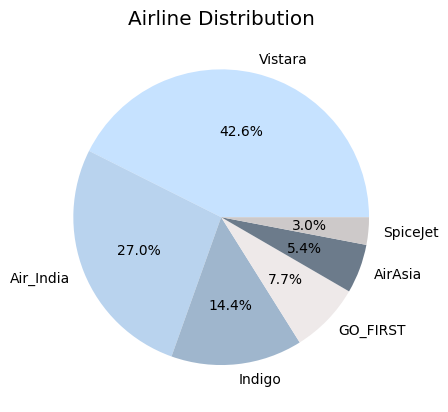

In [76]:
plt.title('Airline Distribution')
airline_counts = df['airline'].value_counts()
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', colors = ["#C6E2FF","#B9D3EE" ,"#9FB6CD","#EEE9E9","#6C7B8B","#CDC9C9"])
plt.show()

* **We see that the leading airline is Vistara**
* **Vistara is a joint venture between Tata Sons (an Indian conglomerate) and Singapore Airlines. This partnership provides Vistara with access to resources, expertise, and a strong brand reputation, which can contribute to its market share and customer preference.**
* **Vistara is often known for its high-quality service and customer satisfaction. This positive reputation can attract more passengers and increase loyalty.**
* **Vistara's pricing strategy and promotional offers could be more attractive to passengers compared to its competitors.**

* **SpiceJet has the lowest percentage**
* **SpiceJet has faced various operational challenges in the past, including financial difficulties, pilot shortages, and aircraft grounding issues. These challenges can impact the airline's reliability and customer satisfaction.**
* **SpiceJet's fleet might consist of older aircraft compared to some of its competitors. Older aircraft can have higher maintenance costs and may not offer the same level of comfort and amenities as newer planes.**

In [77]:
df['class'].value_counts()


class
Economy     206666
Business     93487
Name: count, dtype: int64

<Axes: title={'center': 'Class'}, ylabel='count'>

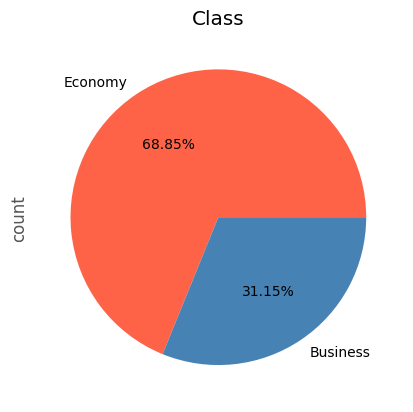

In [78]:
plt.title('Class')
round(df['class'].value_counts()/df.shape[0]*100, 2).plot.pie(autopct="%1.2f%%", colors=["#FF6347", "#4682B4"])


* **The most class which books tickects is Economy ,But the most higher price range is a Business Class.**
* **Economy class tickets are generally more affordable than Business class, making them accessible to a wider range of travelers.**
* **Economy class offers basic amenities and services that meet the needs of many travelers, making it a practical choice for those who prioritize affordability over luxury.**
* **Frequent travelers or those on business trips often choose Economy class to save costs, especially if their travel is primarily for work purposes.**

In [79]:
df['stops'].value_counts()


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

<Axes: xlabel='stops', ylabel='price'>

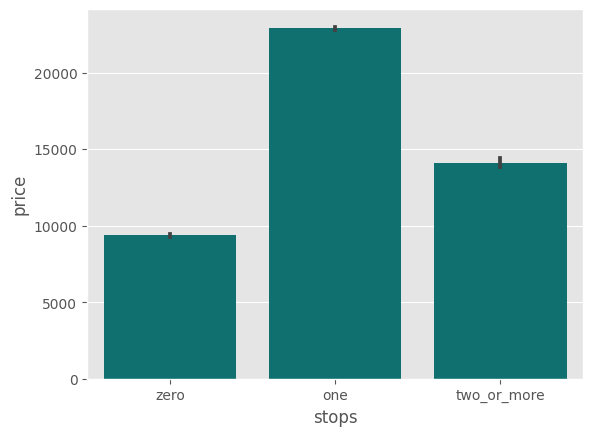

In [80]:
sns.barplot(data=df, x="stops", y="price", color='#008080')  


* **We see that the price is higher when the trip stops once**

In [81]:
df['source_city'].value_counts()


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [82]:
fig = px.bar(df['source_city'].value_counts(), x=df['source_city'].value_counts().index, y=df['source_city'].value_counts().values)
fig.update_layout(xaxis_title="Source City", yaxis_title="Count")
fig.show()


* **We see that most flights take off from New Delhi as it is the capital**

# **Business Question :**

# How does the ticket price vary between Economy and Business class?


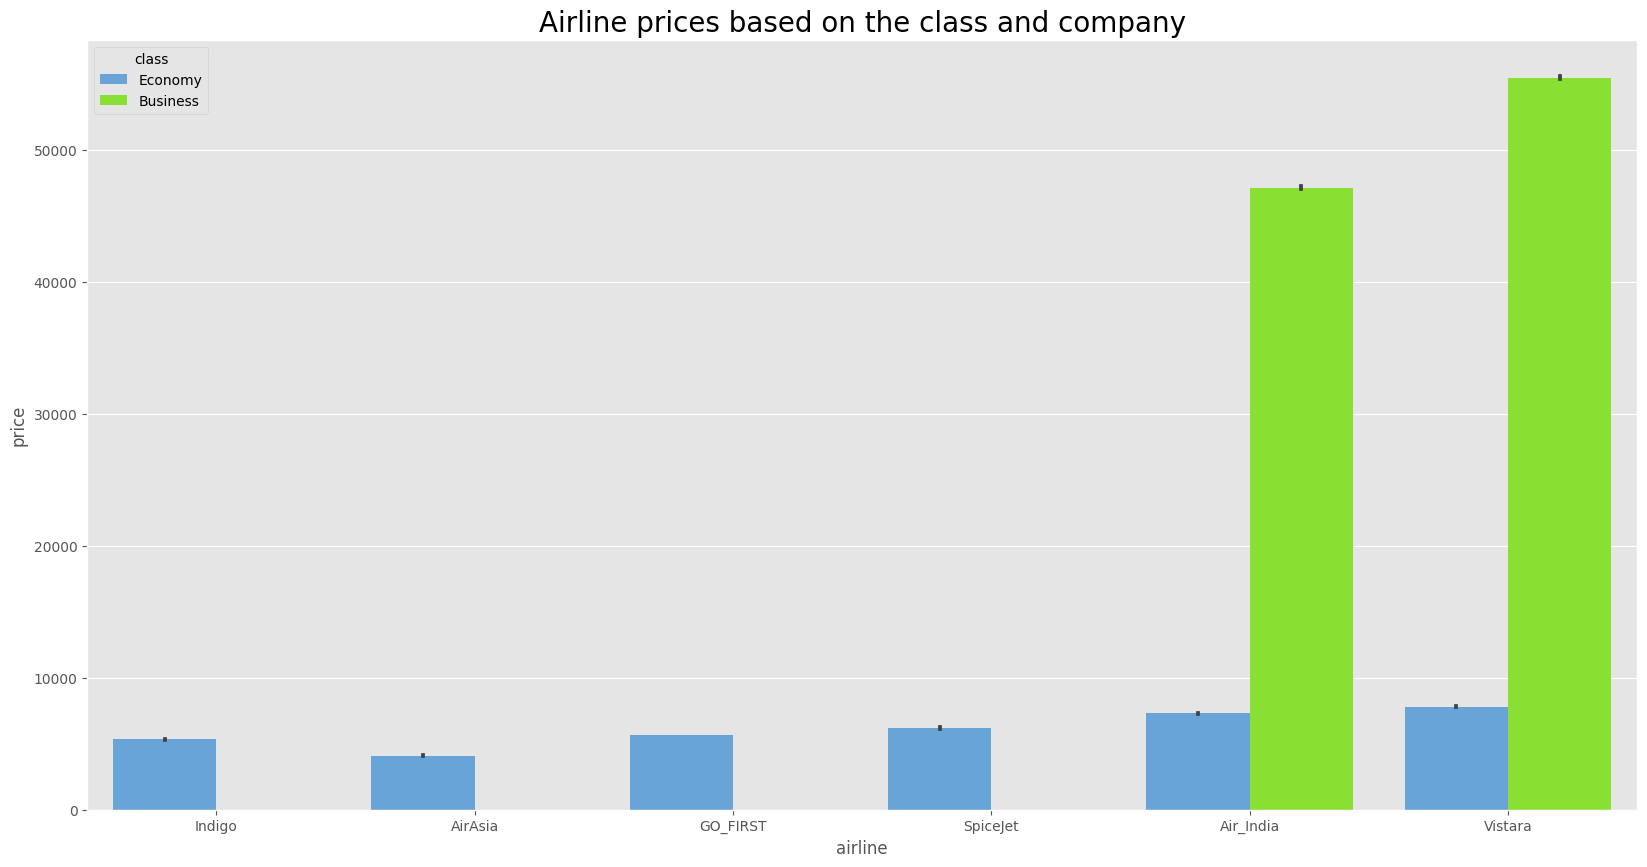

In [83]:


plt.figure(figsize=(20, 10))

custom_palette = ["#56A5EC", "#8AFB17", "#3357FF"]  

sns.barplot(x='airline', y='price', hue="class", data=df.sort_values("price"), palette=custom_palette) \
    .set_title('Airline prices based on the class and company', fontsize=20)

plt.show()


👉🏻 Business flights are only available in two companies: Air India and Vistara. Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

# Does price vary with Airlines?


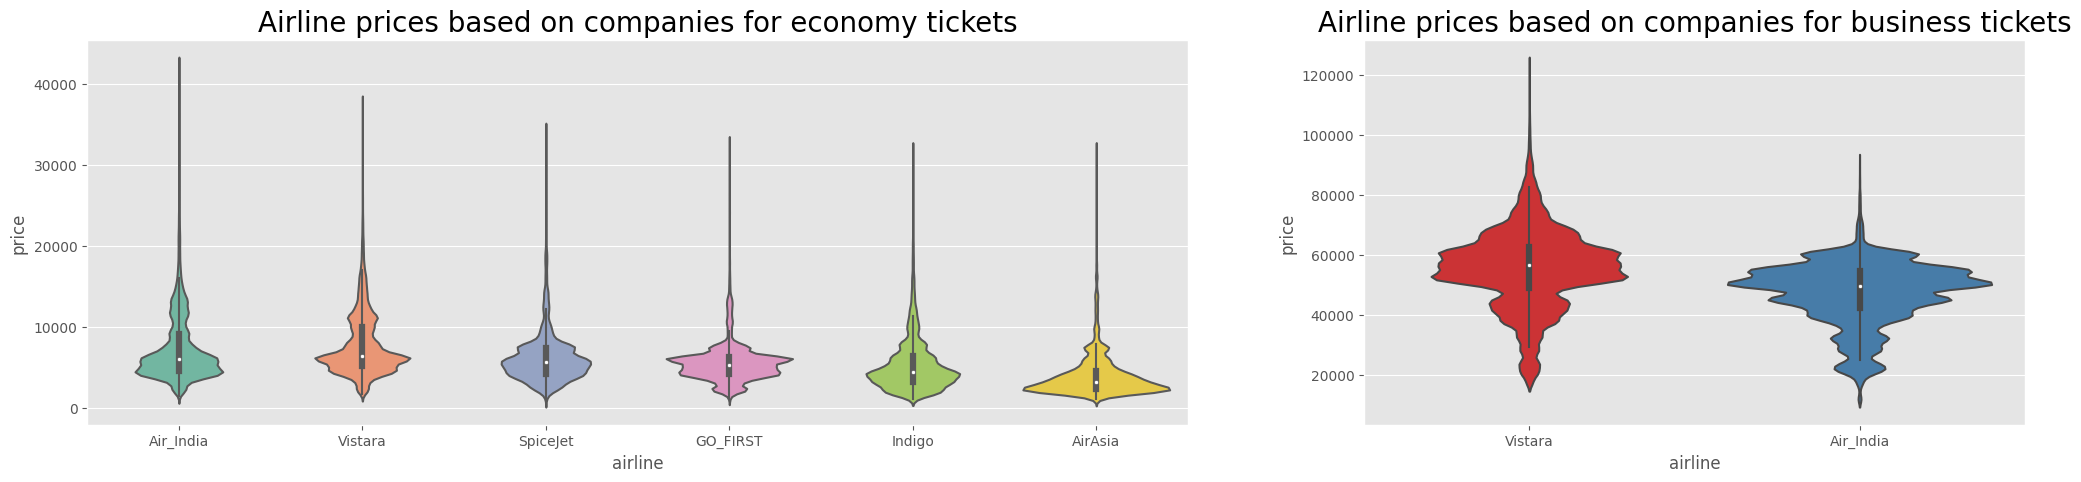

In [84]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))

sns.violinplot(y="price", x="airline", data=df.loc[df["class"] == 'Economy'].sort_values("price", ascending=False),
               palette="Set2", ax=axs[0])
axs[0].set_title("Airline prices based on companies for economy tickets", fontsize=20)

sns.violinplot(y="price", x="airline", data=df.loc[df["class"] == 'Business'].sort_values("price", ascending=False),
               palette="Set1", ax=axs[1])
axs[1].set_title("Airline prices based on companies for business tickets", fontsize=20)

plt.show()


👉🏻 There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Air India and Vistara are more expensive. However it looks like Vistara's business tickets are a little more expensive than the Air India's ones.



* **Air India and Vistara might have higher operating costs due to factors like fleet size, maintenance expenses, or labor costs. These higher costs could be passed on to consumers in the form of higher ticket prices.**
* **Air India and Vistara might position themselves as premium airlines, offering additional services and amenities that justify higher prices.**
* **These airlines might target specific market segments that are willing to pay more for their services, such as corporate travelers or those seeking a higher level of comfort.**

# What is Most popular Airline ?


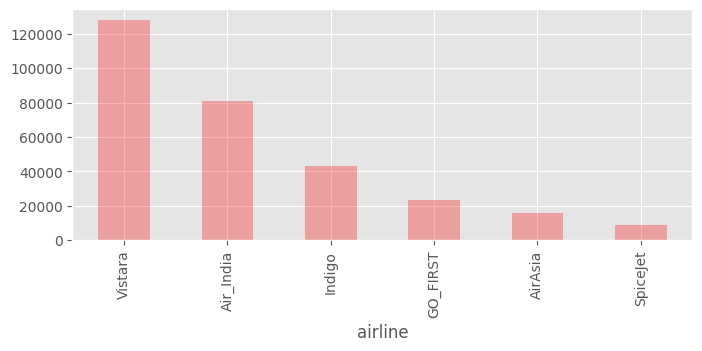

In [85]:
plt.figure(figsize=(8,3))
df['airline'].value_counts().plot(kind='bar', color='red', alpha=0.3);

👉🏻 From the figure we notice that the most famous airlines in India are Vistara and Air_India 

# How is the price affected when tickets are bought before departure ?

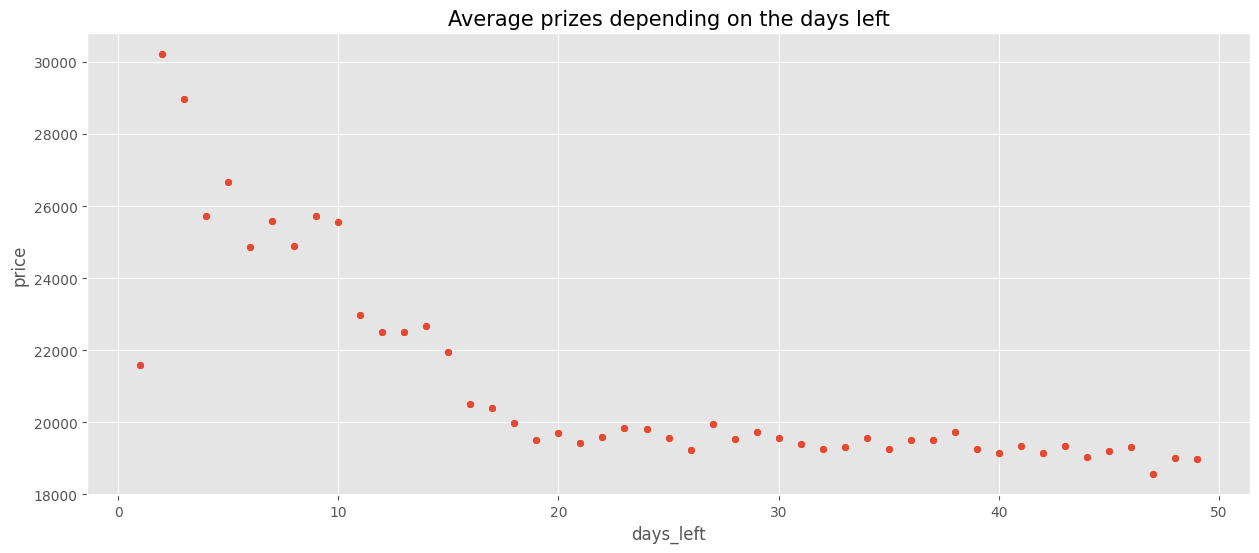

In [86]:
grouped_df = df.groupby(['days_left'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="days_left", y="price", data=grouped_df).set_title("Average prizes depending on the days left",fontsize=15)

👉🏻 he graph highlights how the prices rise slowly and then drastically start rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.


#  Does ticket price change based on the departure time and arrival time?


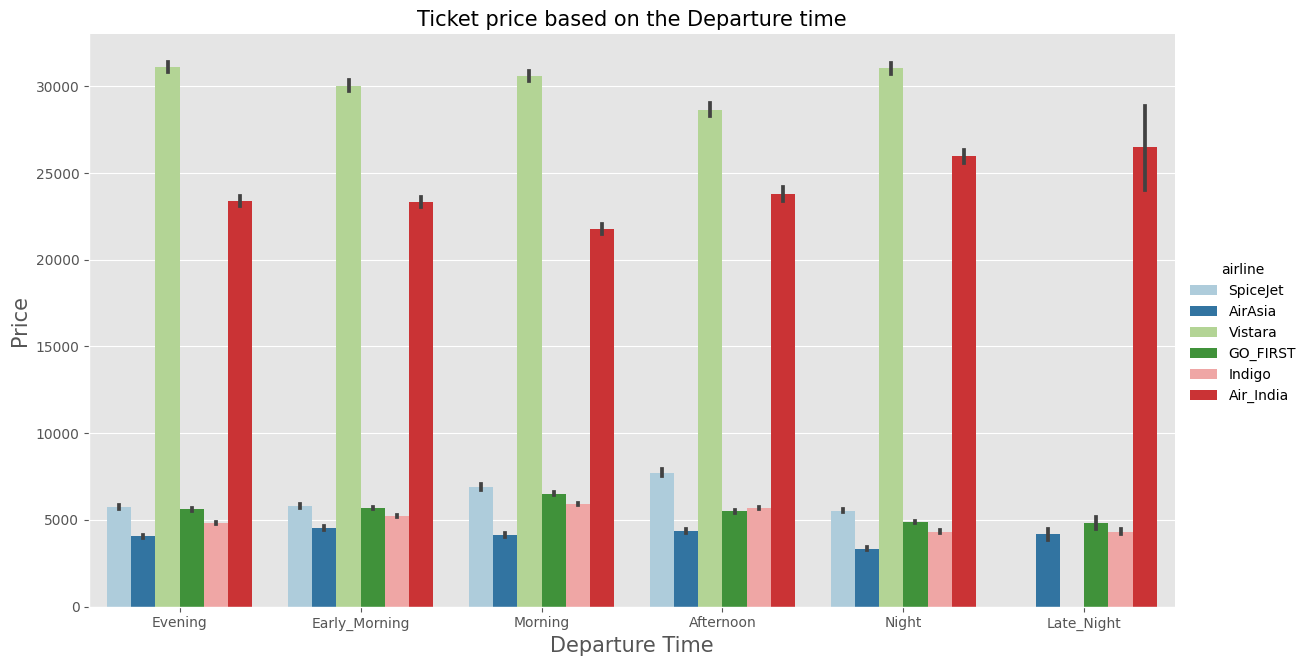

In [87]:
sns.catplot(data=df, kind="bar", x="departure_time", y="price", hue="airline", height=6.5, aspect=12/6.5 ,palette='Paired')
plt.title('Ticket price based on the Departure time',fontsize=15)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

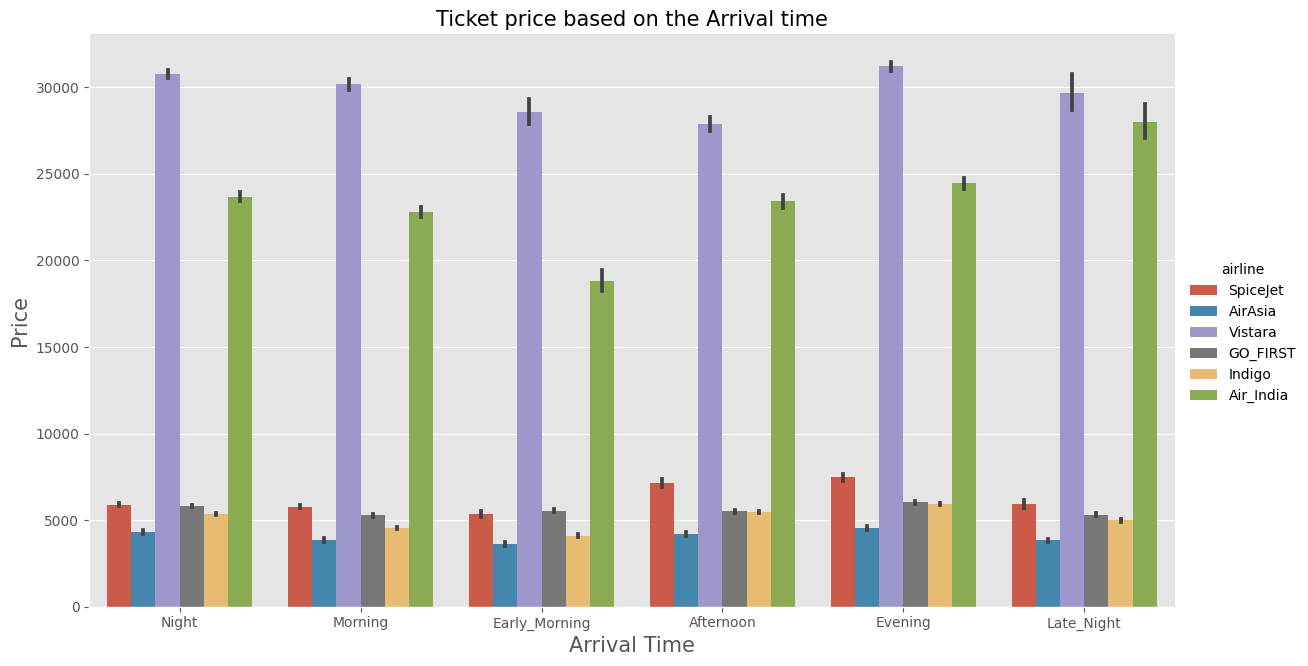

In [88]:
sns.catplot(data=df, kind="bar", x="arrival_time", y="price", hue="airline", height=6.5, aspect=12/6.5)
plt.title('Ticket price based on the Arrival time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# What is the most expensive flight between two cities?

In [89]:
grouped_data_city = df.groupby(['source_city','destination_city'])['price'].mean().sort_values(ascending=False)
grouped_data_city

source_city  destination_city
Chennai      Bangalore           25081.850454
Kolkata      Chennai             23660.361040
Bangalore    Kolkata             23500.061229
             Chennai             23321.850078
Mumbai       Bangalore           23147.873807
Bangalore    Mumbai              23128.618672
Mumbai       Chennai             22781.899112
Chennai      Mumbai              22765.849647
Kolkata      Bangalore           22744.808428
Chennai      Kolkata             22669.932407
Mumbai       Kolkata             22379.146723
Kolkata      Mumbai              22078.883579
Hyderabad    Chennai             21848.065989
Chennai      Hyderabad           21591.345404
Kolkata      Hyderabad           21500.011397
Hyderabad    Bangalore           21347.177998
Bangalore    Hyderabad           21226.121192
Mumbai       Hyderabad           21004.046705
Hyderabad    Kolkata             20823.893201
Delhi        Kolkata             20566.409418
Hyderabad    Mumbai              20080.865759
Kolk

<Axes: xlabel='source_city,destination_city'>

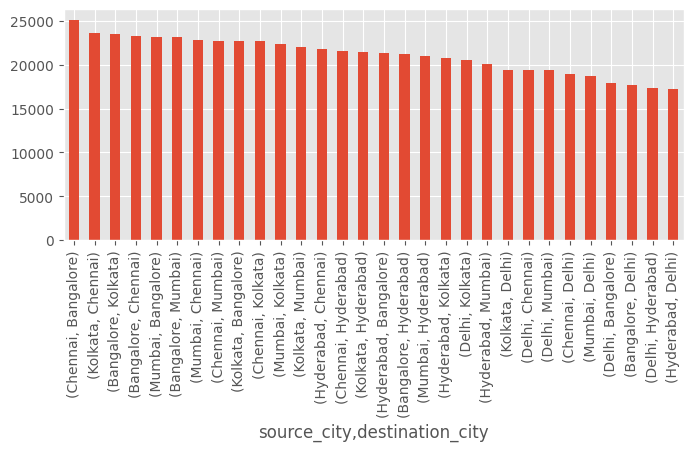

In [90]:
fig = plt.figure(figsize = (8, 3))
grouped_data_city.plot(kind='bar')

👉 **We note that the most expensive flight is from Chennai to Bangalore**

# Does the number of stops influences the price?

Text(0.5, 1.0, 'Airline prices based on the number of stops  for business')

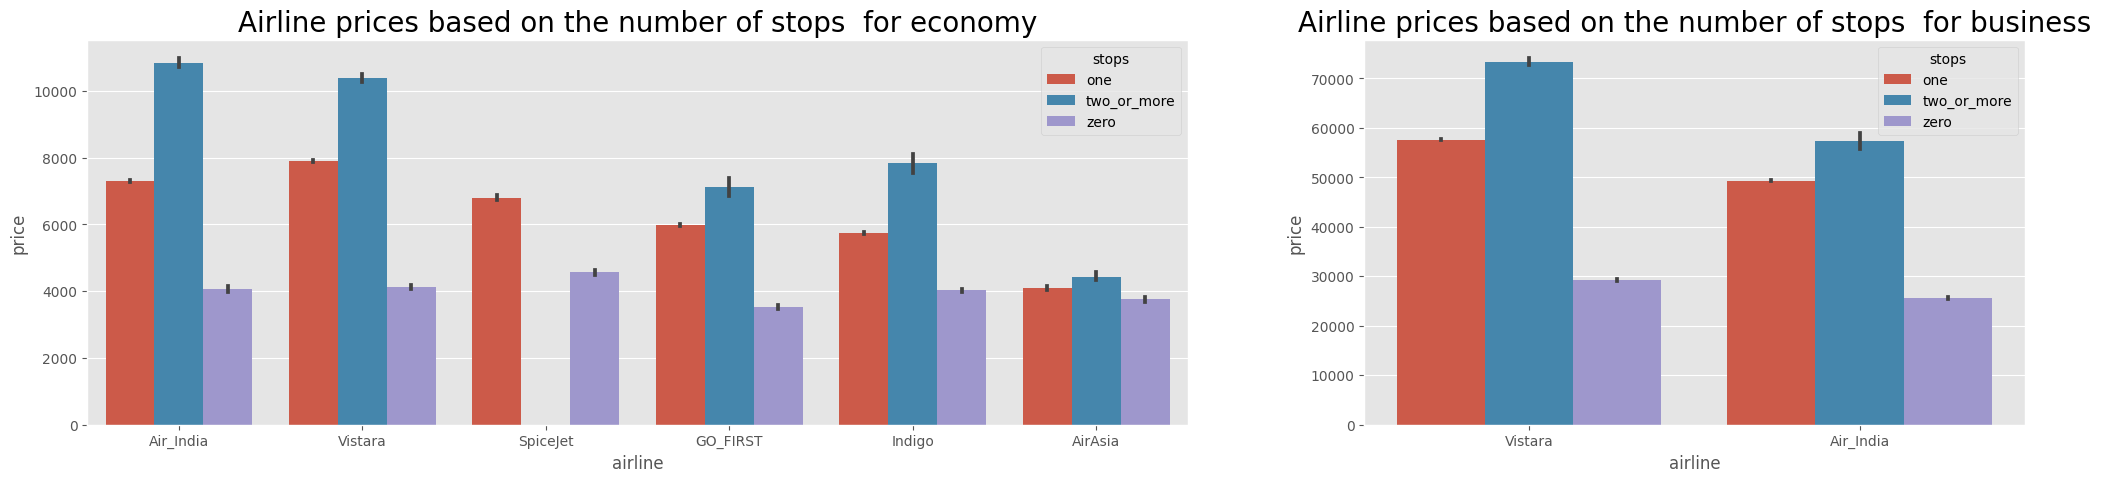

In [91]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Airline prices based on the number of stops  for economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Airline prices based on the number of stops  for business",fontsize=20)

👉🏻**It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant.**

# **Data Cleaning**

In [92]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [93]:
numerical_col = [col for col in df.columns if df[col].dtype != 'O']
categorical_col = [col for col in df.columns if col not in numerical_col]

In [94]:
for col in categorical_col:
  print(f'{col} has {df[col].nunique()} unique values')
  print(df[col].unique())
  print('-'*100)

airline has 6 unique values
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
----------------------------------------------------------------------------------------------------
flight has 1561 unique values
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
----------------------------------------------------------------------------------------------------
source_city has 6 unique values
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
----------------------------------------------------------------------------------------------------
departure_time has 6 unique values
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
----------------------------------------------------------------------------------------------------
stops has 3 unique values
['zero' 'one' 'two_or_more']
----------------------------------------------------------------------------------------------------
arrival_time has 6 unique values
['Night' 'Morning' 

**Handling outliers**

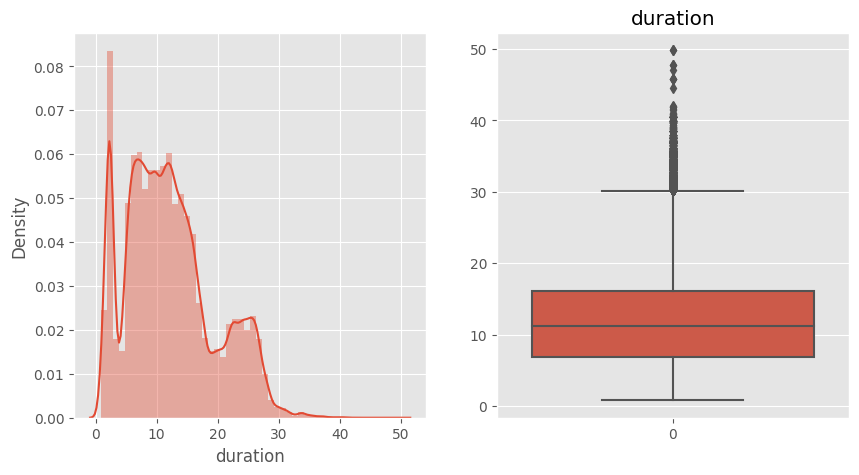

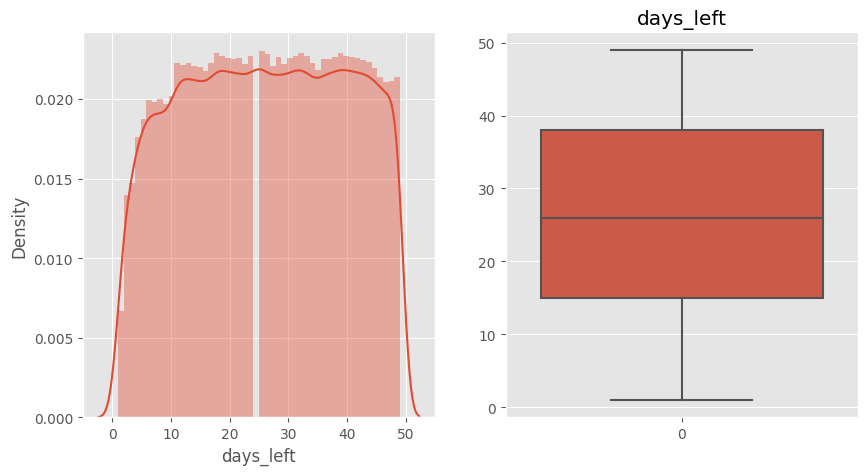

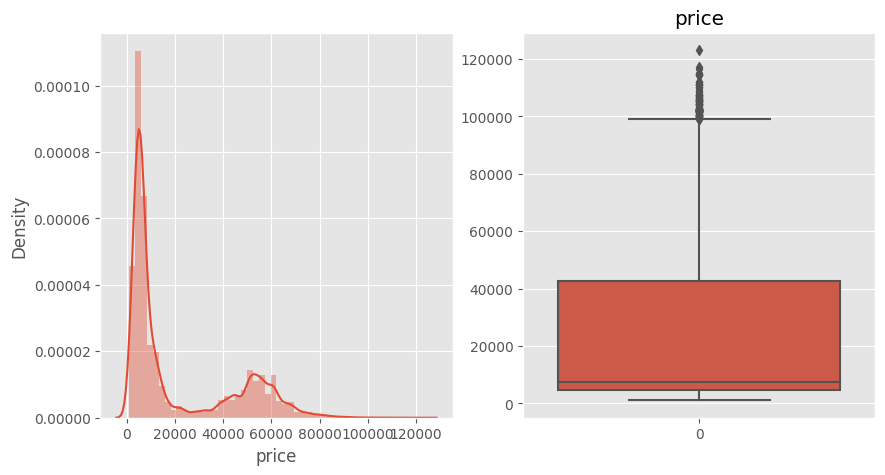

In [95]:
for i in range(len(numerical_col)):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.distplot(df[numerical_col[i]])
  plt.subplot(1,2,2)
  sns.boxplot(df[numerical_col[i]])
  plt.title(numerical_col[i])
  plt.show()

In [96]:
cleaned_df = df.copy()  

In [97]:
for col in numerical_col:
  print(f'{col} has {cleaned_df[col].skew()} skewness')

duration has 0.6028991297746269 skewness
days_left has -0.03546434955066582 skewness
price has 1.0613772532064343 skewness


In [98]:
cleaned_df['price'] = np.log1p(cleaned_df['price'])

In [99]:
for col in numerical_col:
  Q1 = cleaned_df[col].quantile(0.25)
  Q3 = cleaned_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = cleaned_df[(cleaned_df[col] < lower_bound) | (cleaned_df[col] > upper_bound)]
  print(f'Outliers in {col}:')
  print(outliers.shape)

Outliers in duration:
(2110, 11)
Outliers in days_left:
(0, 11)
Outliers in price:
(0, 11)


# **Data Transformation**

### **1. Categorical Encoding**

Flight number extraction from flight column to make a meaningful column as these numbers represent the age of the flight

In [100]:
cleaned_df['flight_number'] = cleaned_df['flight'].str.split('-').str[1]
cleaned_df['flight_number'] = pd.to_numeric(cleaned_df['flight_number'], errors='coerce')

In [101]:
cleaned_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_number
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,8.691819,8709
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,8.691819,8157
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,8.692322,764
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,8.692154,995
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,8.692154,963


In [102]:
cleaned_df.duplicated().sum()

0

In [103]:
cleaned_df.drop(columns=['flight'],inplace=True)

In [104]:
cleaned_df = pd.get_dummies(cleaned_df, columns=['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class'])

In [105]:
cleaned_df['stops'] = cleaned_df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})

In [106]:
cleaned_df.head()

,stops,duration,days_left,price,flight_number,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,2.17,1,8.691819,8709,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
1,0,2.33,1,8.691819,8157,False,False,False,False,True,...,True,False,False,False,False,False,False,True,False,True
2,0,2.17,1,8.692322,764,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,0,2.25,1,8.692154,995,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,0,2.33,1,8.692154,963,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True


In [107]:
for col in cleaned_df.columns:
  if cleaned_df[col].dtype == 'bool':
    cleaned_df[col] = cleaned_df[col].astype(int)

### **2. Data Skewed**

In [108]:
numerical_col = [col for col in cleaned_df.columns if cleaned_df[col].dtype != 'O']
categorical_col = [col for col in cleaned_df.columns if col not in numerical_col]

In [109]:
for col in numerical_col:
  print(f'{col} has {cleaned_df[col].skew()} skewness')

stops has -0.6223632829321687 skewness
duration has 0.6028991297746269 skewness
days_left has -0.03546434955066582 skewness
price has 0.40452027498368964 skewness
flight_number has 2.8155921434850284 skewness
airline_AirAsia has 3.9625987353046543 skewness
airline_Air_India has 1.0389807253400491 skewness
airline_GO_FIRST has 3.168038347495886 skewness
airline_Indigo has 2.03191497090746 skewness
airline_SpiceJet has 5.50825520107041 skewness
airline_Vistara has 0.29938264864368913 skewness
source_city_Bangalore has 1.7249014715476891 skewness
source_city_Chennai has 2.214488528535776 skewness
source_city_Delhi has 1.4662601049462294 skewness
source_city_Hyderabad has 2.1243812978675884 skewness
source_city_Kolkata has 1.912813790886483 skewness
source_city_Mumbai has 1.4776628649296133 skewness
departure_time_Afternoon has 1.8626763998345788 skewness
departure_time_Early_Morning has 1.3342433795582391 skewness
departure_time_Evening has 1.3738602773776425 skewness
departure_time_Late_

## **3. Scaling**

In [110]:
copy1 = cleaned_df.copy()
copy2 = cleaned_df.copy()
copy3 = cleaned_df.copy()

In [111]:
#Spliting on copy1
X = copy1.drop(['price'], axis = 1)
y = copy1['price']
X_train_C1, X_test_C1, y_train_C1, y_test_C1 = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [112]:
# Standard Scaler on copy1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_C1 = scaler.fit_transform(X_train_C1)
X_test_C1 = scaler.transform(X_test_C1)

In [113]:
#Spliting on copy2
X = copy2.drop(['price'], axis = 1)
y = copy2['price']
X_train_C2, X_test_C2, y_train_C2, y_test_C2 = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [114]:
# Normalization Scaling on copy2
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train_C2 = min_max.fit_transform(X_train_C2)
X_test_C2 = min_max.transform(X_test_C2)

In [115]:
#Spliting on copy3
X = copy3.drop(['price'], axis = 1)
y = copy3['price']
X_train_C3, X_test_C3, y_train_C3, y_test_C3 = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [116]:
# Robust Scaling on copy3
from sklearn.preprocessing import RobustScaler
rob = RobustScaler()
X_train_C3 = rob.fit_transform(X_train_C3)
X_test_C3 = rob.transform(X_test_C3)

#### Comparsion between each scaling method on train, test and original data

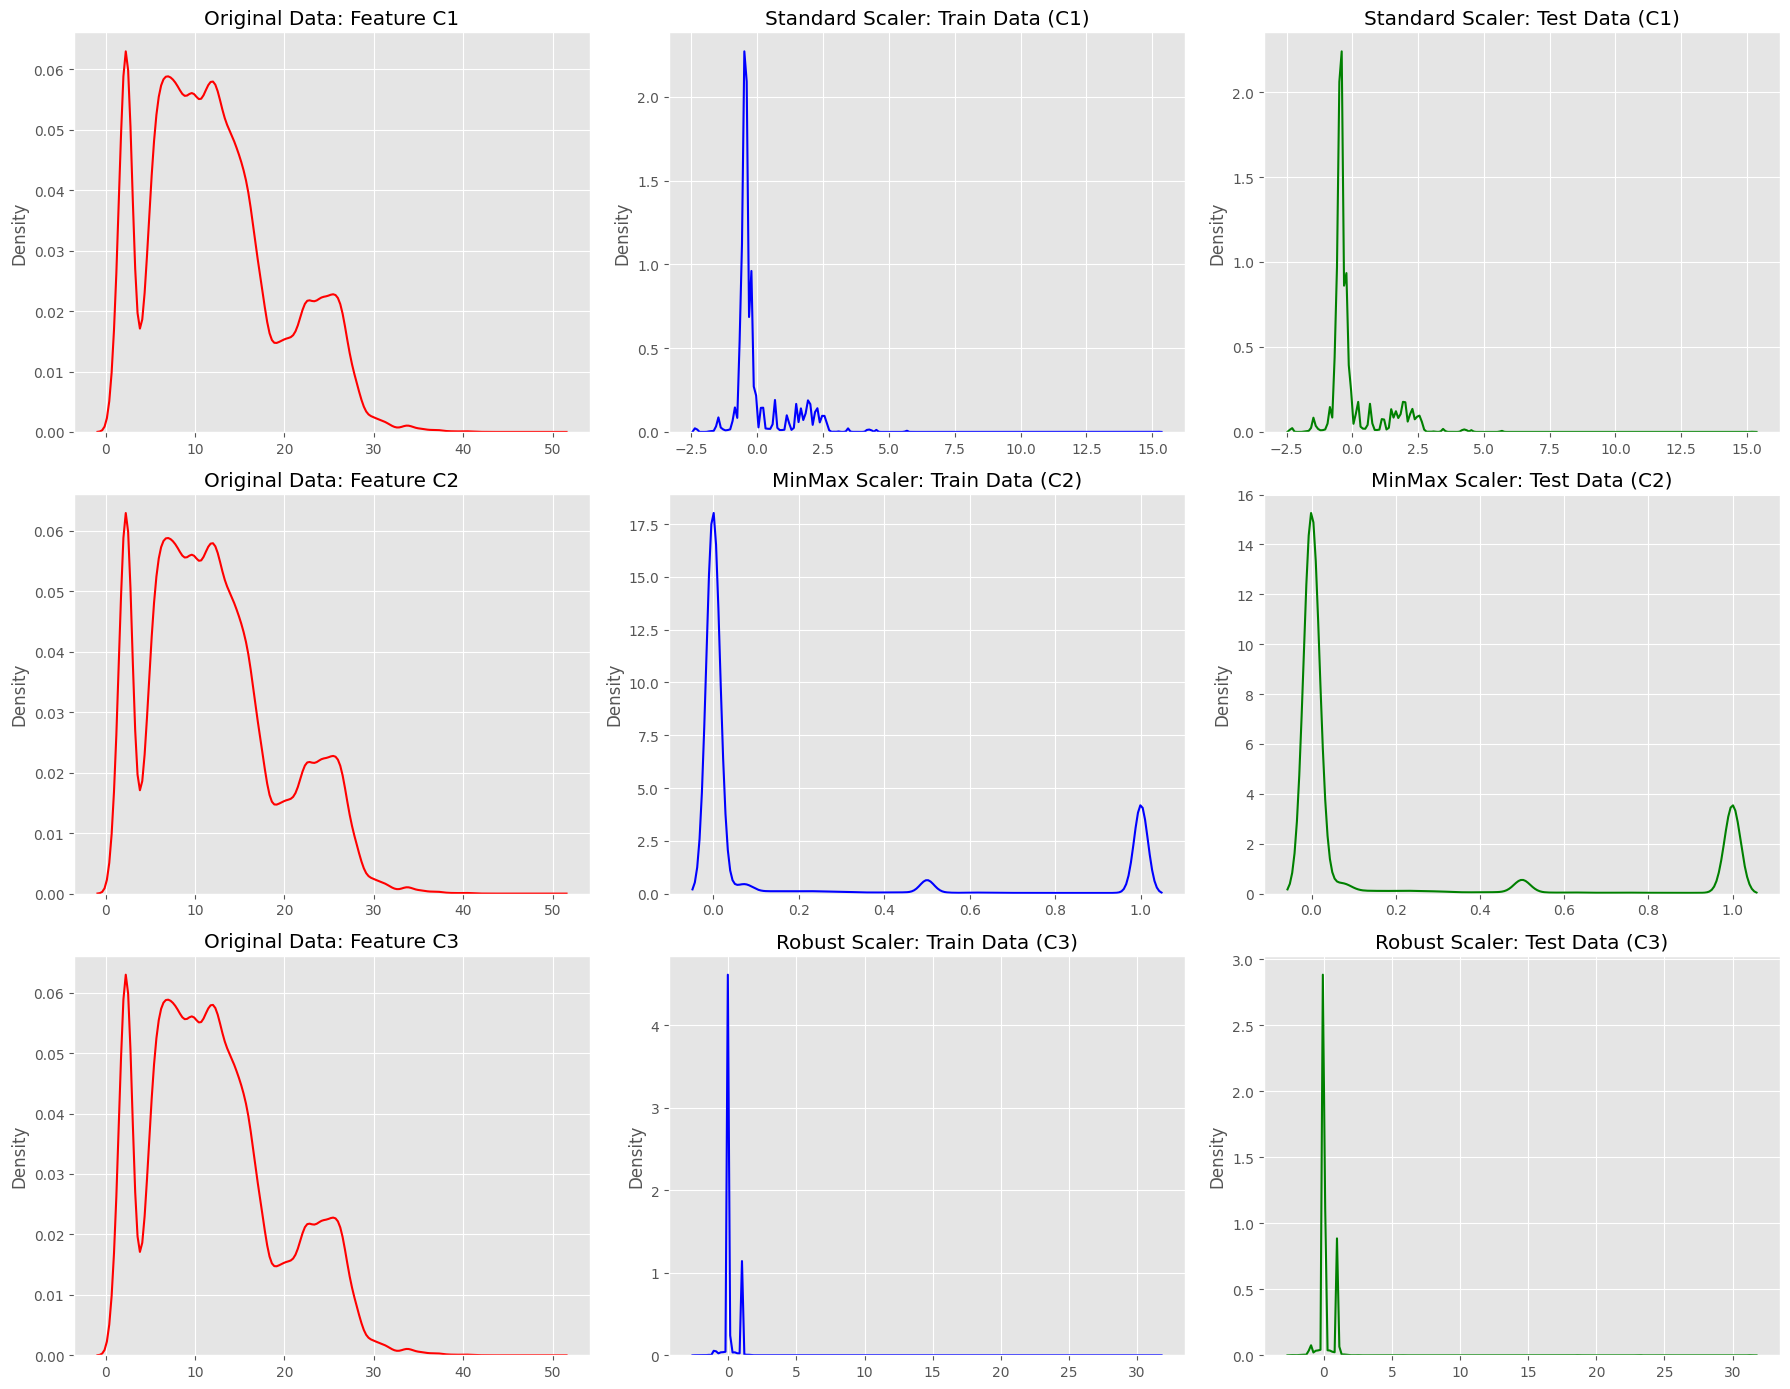

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for the scaled data
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

# Plot KDE for original (before scaling) and scaled data using Standard Scaler
sns.kdeplot(cleaned_df['duration'].to_numpy(), ax=axes[0, 0], color='red', label='Original Data')
sns.kdeplot(X_train_C1.flatten(), ax=axes[0, 1], color='blue', label='Scaled Train Data')
sns.kdeplot(X_test_C1.flatten(), ax=axes[0, 2], color='green', label='Scaled Test Data')
axes[0, 0].set_title("Original Data: Feature C1")
axes[0, 1].set_title("Standard Scaler: Train Data (C1)")
axes[0, 2].set_title("Standard Scaler: Test Data (C1)")

# Plot KDE for original (before scaling) and scaled data using MinMax Scaler
sns.kdeplot(cleaned_df['duration'].to_numpy(), ax=axes[1, 0], color='red', label='Original Data')
sns.kdeplot(X_train_C2.flatten(), ax=axes[1, 1], color='blue', label='Scaled Train Data')
sns.kdeplot(X_test_C2.flatten(), ax=axes[1, 2], color='green', label='Scaled Test Data')
axes[1, 0].set_title("Original Data: Feature C2")
axes[1, 1].set_title("MinMax Scaler: Train Data (C2)")
axes[1, 2].set_title("MinMax Scaler: Test Data (C2)")

# Plot KDE for original (before scaling) and scaled data using Robust Scaler
sns.kdeplot(cleaned_df['duration'].to_numpy(), ax=axes[2, 0], color='red', label='Original Data')
sns.kdeplot(X_train_C3.flatten(), ax=axes[2, 1], color='blue', label='Scaled Train Data')
sns.kdeplot(X_test_C3.flatten(), ax=axes[2, 2], color='green', label='Scaled Test Data')
axes[2, 0].set_title("Original Data: Feature C3")
axes[2, 1].set_title("Robust Scaler: Train Data (C3)")
axes[2, 2].set_title("Robust Scaler: Test Data (C3)")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# **Data Reduction**

**PCA**

In [118]:
# Applying PCA to Standard Scaled Data copy 1
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
Pca = pca.fit_transform(X_train_C1)
pca_std_Train = pd.DataFrame(Pca)

pca_std_Train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.439689,1.430131,-0.744878,-0.968905,-0.076824,1.330561,-1.917591,-1.638801,-0.107120,-0.914216,...,-1.318778,-0.500831,0.414124,1.107997,-0.187753,0.069266,1.240948,0.584718,0.565488,-1.594528
1,-1.940589,-2.904319,1.075448,0.647429,0.137620,0.023029,-0.485778,-1.110497,-1.240632,0.686206,...,0.700211,-0.299331,0.164822,0.020379,1.027078,1.697298,-1.013110,0.379990,0.312820,-0.615384
2,-2.206445,-1.462053,1.082403,1.418634,1.187853,1.507496,0.512948,-1.108742,1.031374,0.776868,...,0.360562,-0.076790,-0.875898,0.119019,-1.107361,-0.673481,-1.225454,-0.096392,0.492185,0.496503
3,0.311737,0.067994,-2.480492,0.067972,-1.685704,0.755118,-0.634012,0.513848,0.807036,0.223462,...,0.617222,-0.116081,1.043226,0.342779,0.272192,0.367801,0.740087,-1.398488,0.570956,-0.445959
4,1.541385,-1.206896,0.732695,-0.295500,0.840641,-1.010021,-1.012390,2.078084,0.291556,1.310728,...,-0.713076,0.799912,-1.292788,-0.509113,1.350961,-0.886374,-0.380551,-1.264601,0.533859,-0.348362


In [119]:
Pca = pca.transform(X_test_C1)
pca_std_Test = pd.DataFrame(Pca)

pca_std_Test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.290304,2.473450,-1.015687,1.061756,1.362064,1.218662,0.560356,-0.323667,0.461199,-0.097888,...,0.847849,0.582133,-0.777861,-0.594470,-0.233172,0.548124,-1.438810,-0.943132,-1.475746,-1.689377
1,-1.911065,-2.150388,-1.920211,-1.567224,0.756016,-0.989218,-1.115467,0.254508,-0.520988,-0.493521,...,-0.495045,0.902806,-0.562858,-1.367690,-1.725057,-0.523847,-0.397247,0.979651,-0.311632,-0.354910
2,0.086508,-1.368382,-1.907673,0.666939,-0.654534,-1.835606,-1.585816,-0.034052,0.162260,-1.275127,...,-0.390924,1.204315,0.071572,-1.496765,-0.542723,-0.467841,-0.195111,-1.022065,-0.102403,0.212139
3,-2.492482,-0.656768,2.291239,-1.235697,-1.002463,-0.195770,-1.202548,-1.320520,-0.597232,-0.908623,...,-0.337722,-0.181981,-0.613021,1.839043,0.432229,-0.347138,-0.398721,-0.538340,0.395351,-0.970814
4,0.796539,0.187147,-1.305537,-1.390840,1.569535,-1.122418,0.367352,1.023773,-0.418893,2.208566,...,-1.713931,0.187214,0.740465,0.379868,0.445841,-0.219388,1.362759,-0.542211,-1.248576,0.550946


In [120]:
# Applying PCA to Min Max scaled data copy 2
pca = PCA(n_components=0.95)
Pca = pca.fit_transform(X_train_C2)
pca_norm_Train = pd.DataFrame(Pca)

pca_norm_Train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.024125,-0.303401,-0.047133,1.109587,0.725246,0.382459,-0.185084,-0.777388,-0.100854,0.318478,...,-0.454036,-0.300200,0.488467,0.106168,-0.402281,-0.281686,-0.168906,-0.415867,0.158382,-0.038037
1,1.166739,-0.647997,-0.475094,-0.912354,-0.136093,0.087277,-0.548784,-0.060613,0.191000,0.139720,...,-0.367539,-0.100548,-0.049785,-0.239087,-0.007342,0.332237,-0.653964,0.063881,0.102661,0.011067
2,1.149631,-0.386998,-0.767383,-0.364134,0.169510,0.218616,0.896910,0.242869,-0.010917,0.382828,...,0.359318,0.332190,-0.214499,-0.711590,-0.128310,-0.195887,0.328423,0.235988,-0.023167,-0.009322
3,-0.113915,-0.489150,0.879758,0.768485,0.452356,-0.698474,0.156900,0.244618,0.042396,-0.526063,...,-0.436907,0.147934,-0.279455,0.192538,-0.040448,-0.005622,0.049188,-0.388651,0.112398,-0.084876
4,-0.624218,-0.277238,0.618761,-0.668640,-0.504046,0.452674,-0.635920,0.387571,-0.469786,0.050454,...,-0.539111,0.331305,-0.177301,0.527231,-0.189602,-0.406443,-0.188668,0.708477,-0.151680,-0.537212


In [121]:
Pca = pca.transform(X_test_C2)
pca_norm_Test = pd.DataFrame(Pca)

pca_norm_Test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.558748,0.525332,-0.243327,-0.322607,0.765843,-0.533208,-0.339131,-0.057566,-0.860946,0.352029,...,-0.451119,0.063136,-0.123305,-0.268592,0.357550,-0.388820,0.004248,0.165686,-0.303572,0.282651
1,1.108230,-0.299443,1.056102,-0.548983,0.375974,0.406205,-0.489869,-0.310117,-0.021162,-0.299411,...,0.530752,-0.172532,0.260120,-0.129467,0.167749,-0.620897,-0.117922,0.127764,-0.330446,0.076191
2,-0.091016,-0.819579,0.894269,-0.313532,0.007110,-0.316113,-0.361890,-0.672122,-0.110238,-0.669783,...,0.179487,0.382455,-0.399101,0.140881,0.379061,-0.429514,0.118758,-0.075641,-0.354755,-0.027690
3,1.196101,-0.078880,-0.313680,0.525511,-0.679825,0.509563,-0.496178,-0.640595,0.273863,0.443325,...,-0.300269,0.246940,0.010664,-0.436499,-0.725240,-0.044085,0.190354,-0.023617,0.274157,-0.121344
4,-0.580233,0.641403,0.868005,-0.333222,0.245107,0.521770,0.029382,0.407177,0.256112,0.509574,...,-0.152927,0.437016,0.506542,0.702957,0.174359,0.094457,0.313152,-0.279302,0.026047,0.022905


In [122]:
# Applying PCA to Robust scaled data copy 3
pca = PCA(n_components=0.95)
Pca = pca.fit_transform(X_train_C3)
pca_rob_Train = pd.DataFrame(Pca)

pca_rob_Train.head(5)

,0,1,2,3,4,5,6,7,8
0,-1.894158,0.141087,0.184779,0.465402,-0.396367,0.119892,-1.035099,0.793111,0.343077
1,-1.900053,-0.031561,-1.270252,0.127026,-0.538725,-0.553327,0.778003,-0.191166,0.157638
2,-2.054415,0.209889,-1.063870,-0.145685,-0.393325,-0.797949,0.323480,0.200909,0.131267
3,-1.586708,-0.741300,-0.080590,0.468311,-0.338775,0.974075,-0.644663,0.472323,-0.744023
4,-1.859114,-0.452027,0.475230,-0.791622,-0.117666,0.593795,0.657643,-0.572961,0.553775


In [123]:
Pca = pca.transform(X_test_C3)
pca_rob_Test = pd.DataFrame(Pca)

pca_rob_Test.head(5)

,0,1,2,3,4,5,6,7,8
0,-3.142843,0.561650,0.966222,-0.612878,0.295064,-0.155764,0.501660,0.692477,-0.487876
1,-2.479890,-0.084478,-1.195602,-0.674439,0.022559,0.962912,0.584322,0.319602,0.470982
2,-2.225773,-0.371546,-0.012268,-0.641971,-0.664226,1.019158,0.449086,-0.095585,-0.216159
3,-2.087430,0.597021,-0.985832,0.437408,-0.061760,-0.345034,-0.680644,-0.614802,0.521163
4,-3.135712,-0.537116,0.562610,0.342611,0.726222,0.777877,0.412100,0.222378,0.532950


In [124]:
copy4=cleaned_df.copy()

In [125]:
#Spliting on copy4(No scaling only pca) 

X = copy4.drop(['price'], axis = 1)
y = copy4['price']
X_train_CL, X_test_CL, y_train_CL, y_test_CL = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [126]:
# Applying PCA to normal data 
pca = PCA(n_components=0.95)
Pca = pca.fit_transform(X_train_CL)
pca_clean_Train = pd.DataFrame(Pca)

pca_clean_Train.head(5)

,0
0,-546.971442
1,-543.969974
2,-585.970911
3,-462.967581
4,-544.971842


In [127]:
Pca = pca.transform(X_test_CL)
pca_clean_Test = pd.DataFrame(Pca)

pca_clean_Test.head(5)

,0
0,-911.975045
1,-711.970616
2,-645.970815
3,-593.972044
4,-916.969059


# **Modeling**

## **1st: Random Forest**

#### Modeling on original dataset

In [128]:
# splitting on original data
X = cleaned_df.drop(['price'], axis = 1)
y = cleaned_df['price']
X_train_OR, X_test_OR, y_train_OR, y_test_OR = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [129]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(X_train_OR, y_train_OR)

RandomForestRegressor(random_state=42)

Mean Squared Error on train: 0.0020309433676006616
R-squared on train: 0.9983591104335088
------------------------------------------------------
Mean Squared Error on test: 0.01398645600584839
R-squared on test: 0.9887098532739222


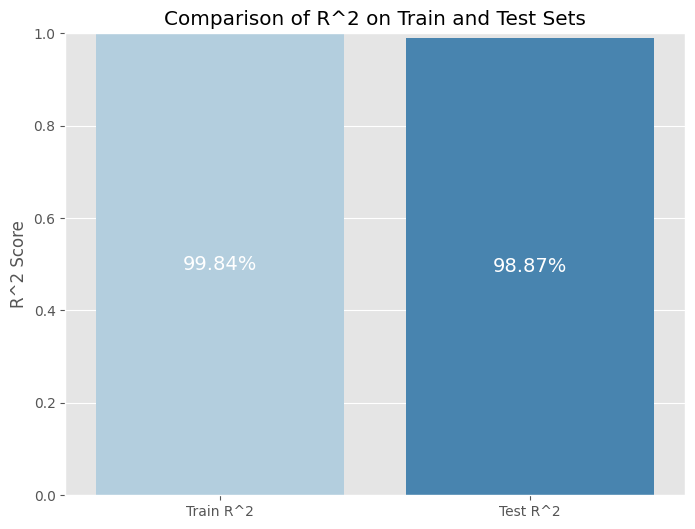

In [130]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_OR_train = rf_model.predict(X_train_OR)
y_pred_OR_test = rf_model.predict(X_test_OR)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_OR, y_pred_OR_train)
r2_train = r2_score(y_train_OR, y_pred_OR_train)
mse_test = mean_squared_error(y_test_OR, y_pred_OR_test)
r2_test = r2_score(y_test_OR, y_pred_OR_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

#### Modeling on copy1 dataset 'Standardization'

In [131]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(X_train_C1, y_train_C1)

RandomForestRegressor(random_state=42)

Mean Squared Error on train: 0.0020322536890081885
R-squared on train: 0.9983580517665067
------------------------------------------------------
Mean Squared Error on test: 0.014012982006614669
R-squared on test: 0.9886884409561355


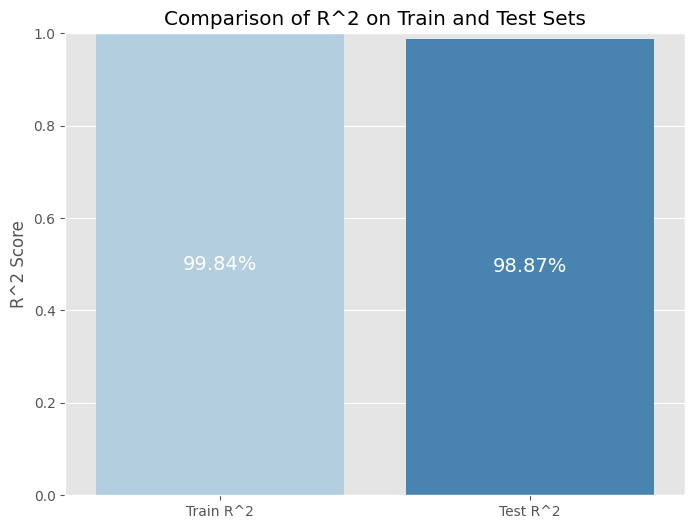

In [132]:
y_pred_C1_train = rf_model.predict(X_train_C1)
y_pred_C1_test = rf_model.predict(X_test_C1)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C1, y_pred_C1_train)
r2_train = r2_score(y_train_C1, y_pred_C1_train)
mse_test = mean_squared_error(y_test_C1, y_pred_C1_test)
r2_test = r2_score(y_test_C1, y_pred_C1_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

#### Modeling on copy2 dataset 'Normalization'

In [133]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(X_train_C2, y_train_C2)

RandomForestRegressor(random_state=42)

Mean Squared Error on train: 0.0020294095119231105
R-squared on train: 0.9983603497037996
------------------------------------------------------
Mean Squared Error on test: 0.013993127081902205
R-squared on test: 0.9887044682480489


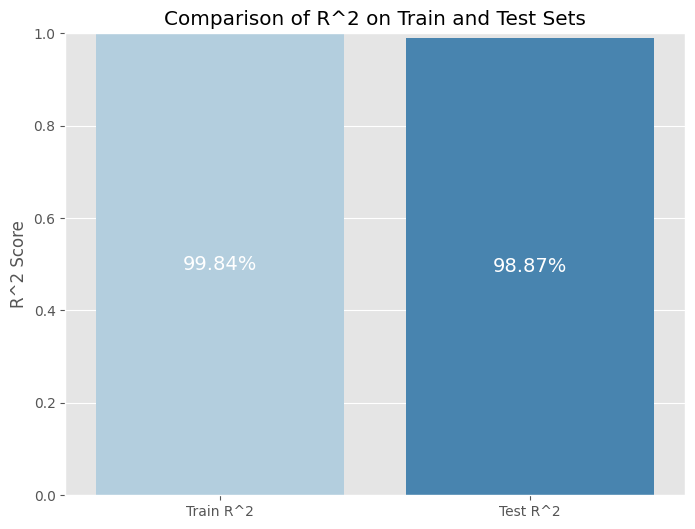

In [134]:
y_pred_C2_train = rf_model.predict(X_train_C2)
y_pred_C2_test = rf_model.predict(X_test_C2)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C2, y_pred_C2_train)
r2_train = r2_score(y_train_C2, y_pred_C2_train)
mse_test = mean_squared_error(y_test_C2, y_pred_C2_test)
r2_test = r2_score(y_test_C2, y_pred_C2_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

#### Modeling on copy3 dataset 'Robust scaler'

In [135]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(X_train_C3, y_train_C3)

RandomForestRegressor(random_state=42)

Mean Squared Error on train: 0.002032794569055011
R-squared on train: 0.9983576147654364
------------------------------------------------------
Mean Squared Error on test: 0.013992953560003693
R-squared on test: 0.9887046083183921


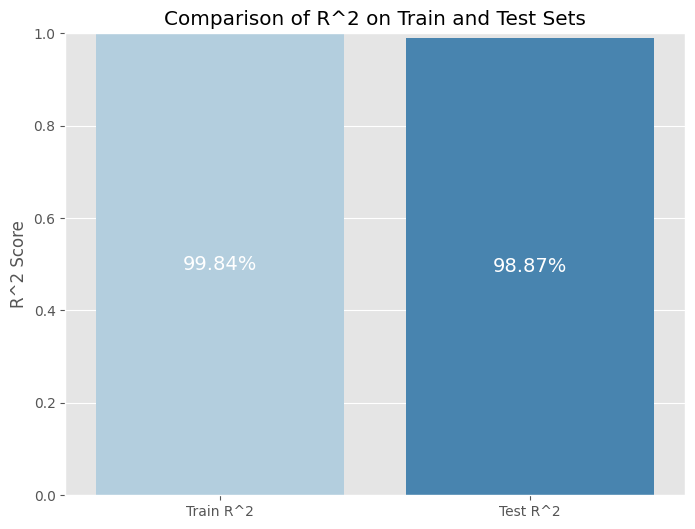

In [136]:
y_pred_C3_train = rf_model.predict(X_train_C3)
y_pred_C3_test = rf_model.predict(X_test_C3)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C3, y_pred_C3_train)
r2_train = r2_score(y_train_C3, y_pred_C3_train)
mse_test = mean_squared_error(y_test_C3, y_pred_C3_test)
r2_test = r2_score(y_test_C3, y_pred_C3_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

#### Modeling on pca of standard scaler

In [137]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(pca_std_Train, y_train_C1)

RandomForestRegressor(n_estimators=10, random_state=42)

Mean Squared Error on train: 0.004612333643082892
R-squared on train: 0.9962734903036453
------------------------------------------------------
Mean Squared Error on test: 0.025278187267523077
R-squared on test: 0.9795949421997775


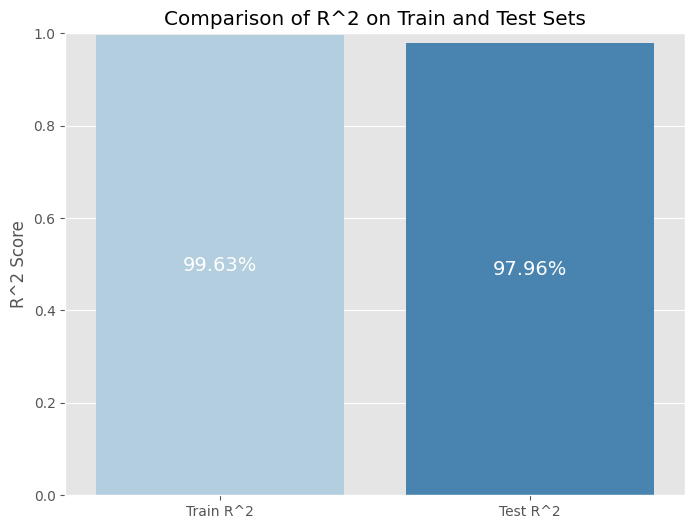

In [138]:
y_pred_pca1_train = rf_model.predict(pca_std_Train)
y_pred_pca1_test = rf_model.predict(pca_std_Test)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C1, y_pred_pca1_train)
r2_train = r2_score(y_train_C1, y_pred_pca1_train)
mse_test = mean_squared_error(y_test_C1, y_pred_pca1_test)
r2_test = r2_score(y_test_C1, y_pred_pca1_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

#### Modeling on pca of normalizarion scaling

In [139]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(pca_norm_Train, y_train_C2)

RandomForestRegressor(n_estimators=10, random_state=42)

Mean Squared Error on train: 0.004448610326970285
R-squared on train: 0.9964057696598727
------------------------------------------------------
Mean Squared Error on test: 0.024279889342227065
R-squared on test: 0.9804007882302671


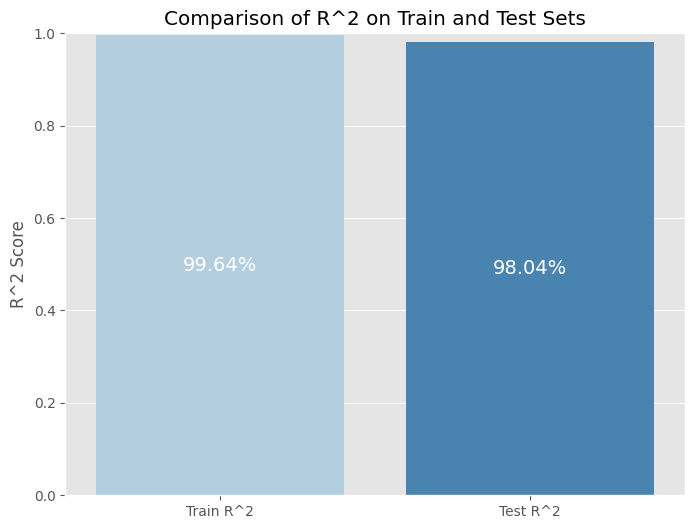

In [140]:
y_pred_pca2_train = rf_model.predict(pca_norm_Train)
y_pred_pca2_test = rf_model.predict(pca_norm_Test)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C2, y_pred_pca2_train)
r2_train = r2_score(y_train_C2, y_pred_pca2_train)
mse_test = mean_squared_error(y_test_C2, y_pred_pca2_test)
r2_test = r2_score(y_test_C2, y_pred_pca2_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

#### Modeling on pca of Robust scaling

In [141]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(pca_rob_Train, y_train_C3)

RandomForestRegressor(n_estimators=10, random_state=42)

Mean Squared Error on train: 0.004019327039622703
R-squared on train: 0.9967526067398795
------------------------------------------------------
Mean Squared Error on test: 0.021805762962157083
R-squared on test: 0.9823979524753175


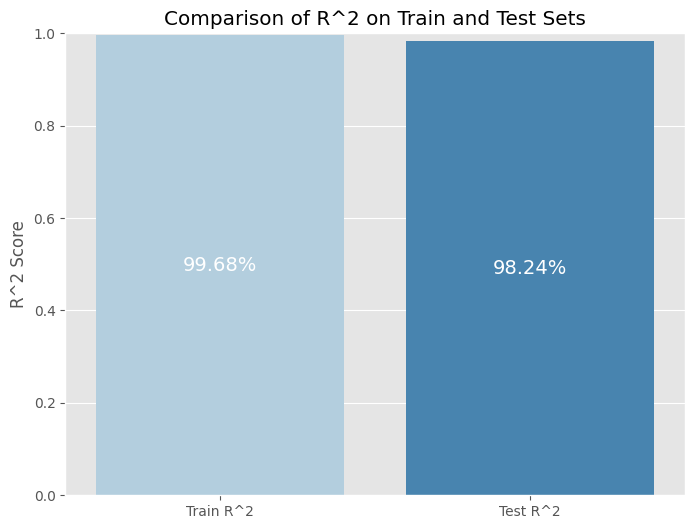

In [142]:
y_pred_pca3_train = rf_model.predict(pca_rob_Train)
y_pred_pca3_test = rf_model.predict(pca_rob_Test)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_C3, y_pred_pca3_train)
r2_train = r2_score(y_train_C3, y_pred_pca3_train)
mse_test = mean_squared_error(y_test_C3, y_pred_pca3_test)
r2_test = r2_score(y_test_C3, y_pred_pca3_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

#### Modeling on pca of original dataset

In [143]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Adjust n_estimators as needed

# Train the model on the original training data
rf_model.fit(pca_clean_Train, y_train_CL)

RandomForestRegressor(n_estimators=10, random_state=42)

Mean Squared Error on train: 0.6743148906581435
R-squared on train: 0.4551909786052899
------------------------------------------------------
Mean Squared Error on test: 1.0009621646876408
R-squared on test: 0.19200334224406956


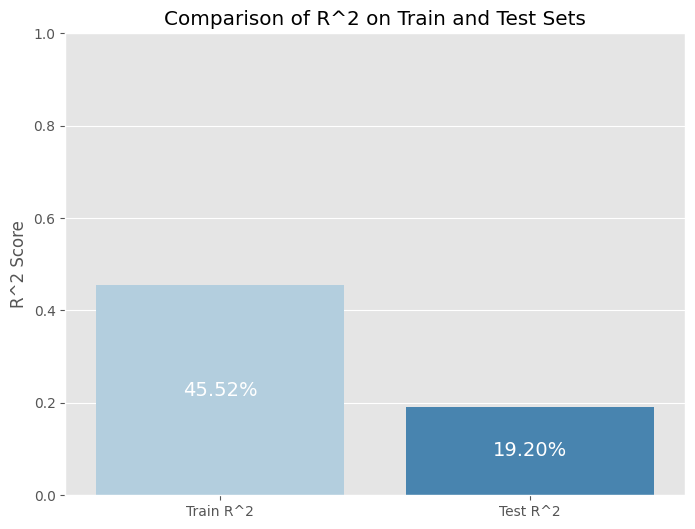

In [144]:
y_pred_pca4_train = rf_model.predict(pca_clean_Train)
y_pred_pca4_test = rf_model.predict(pca_clean_Test)

# Evaluate the model's performance
mse_train = mean_squared_error(y_train_CL, y_pred_pca4_train)
r2_train = r2_score(y_train_CL, y_pred_pca4_train)
mse_test = mean_squared_error(y_test_CL, y_pred_pca4_test)
r2_test = r2_score(y_test_CL, y_pred_pca4_test)

print("Mean Squared Error on train:", mse_train)
print("R-squared on train:", r2_train)
print("------------------------------------------------------")
print("Mean Squared Error on test:", mse_test)
print("R-squared on test:", r2_test)

r2_scores = [r2_train, r2_test]
labels = ['Train R^2', 'Test R^2']

# Plot the R² comparison bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=r2_scores, palette='Blues')

# Add percentage values inside the bars
for i in range(len(r2_scores)):
    plt.text(i, r2_scores[i] / 2, f'{r2_scores[i] * 100:.2f}%', ha='center', va='center', color='white', fontsize=14)

plt.title('Comparison of R^2 on Train and Test Sets')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)  # Since R² ranges from 0 to 1
plt.show()

### Comparsion between the percentage of R2 of each approach by using Random Forest model 

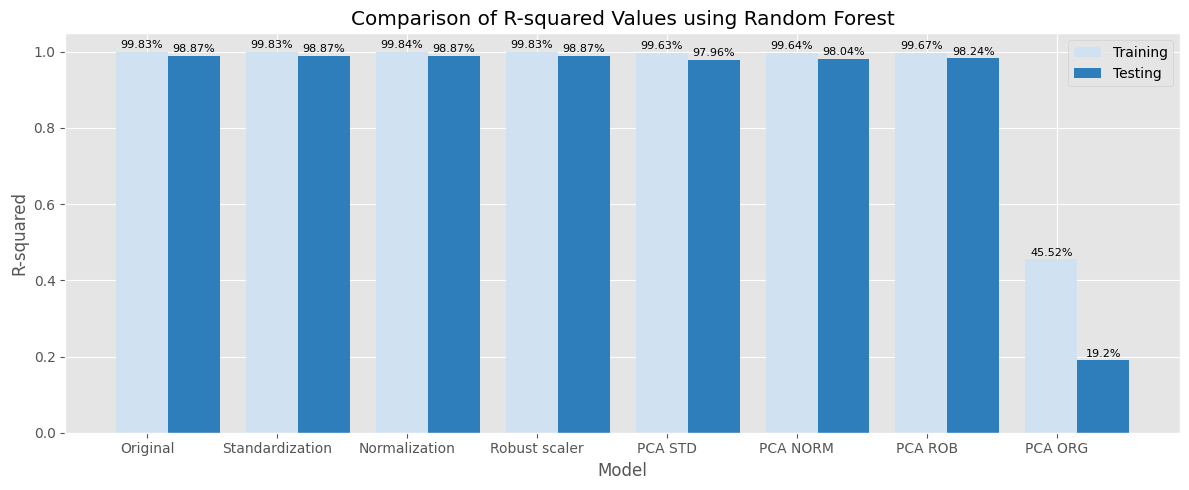

In [145]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap library

# R-squared values for training and testing data
r2_train = [0.99835, 0.99835, 0.99836, 0.99835, 0.99627, 0.99640, 0.99675, 0.45519]
r2_test = [0.98870, 0.98868, 0.98870, 0.98870, 0.97959, 0.98040, 0.98239, 0.19200]

# Create the bar plot
plt.figure(figsize=(12, 5))  # Increase the figure width
width = 0.40  # Width of the bars
index = range(len(r2_train))  # Indices for the x-axis

# Define a blue colormap
cmap = cm.Blues  # Choose a colormap from matplotlib.cm

# Plot the bars for training data with blue colors
rects1 = plt.bar(index, r2_train, width, label='Training', color=cmap(0.2))

# Plot the bars for testing data with blue colors
rects2 = plt.bar([x + width for x in index], r2_test, width, label='Testing', color=cmap(0.7))

# Set labels and title
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Values using Random Forest')

# Adjust x-axis ticks
xticks_pos = [i + width * 0.1 for i in index]  # Adjust the offset value as needed
plt.xticks(xticks_pos)
ax = plt.gca()  # Get the current Axes object
ax.set_xticklabels(['Original', 'Standardization', 'Normalization', 'Robust scaler', 'PCA STD', 'PCA NORM', 'PCA ROB', 'PCA ORG'])

# Add a legend
plt.legend()

# Print percentage of R-squared on each bar
for rect, r2 in zip(rects1 + rects2, r2_train + r2_test):
    height = rect.get_height()
    # Format R-squared to percentage with two decimal places
    r2_percent = f"{round(r2 * 100, 2)}%"
    # Add a text annotation above the bar with the percentage
    ax.text(rect.get_x() + rect.get_width() / 2, 1.005 * height, r2_percent, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## **2st: Linear Regression**

#### Linear regressin on the cleaned_df dataset (Without any scaling or PCA)

Train RMSE: 0.3263196744019619, Train R²: 0.9139664074853007
Test RMSE: 0.32400272442930583, Test R²: 0.9152598503673248


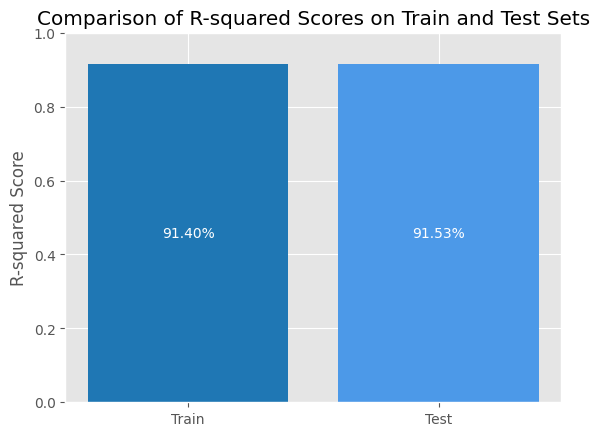

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x = cleaned_df.drop(['price'], axis = 1)
y = cleaned_df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R²: {test_r2}")

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')  # Display as percentage with 2 decimal places

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()


#### Linear regression on Copy1 (Standared Scaler)

Train RMSE: 0.3263244359870378, Train R²: 0.9139638967003797
Test RMSE: 0.3240063279520671, Test R²: 0.9152579654155447


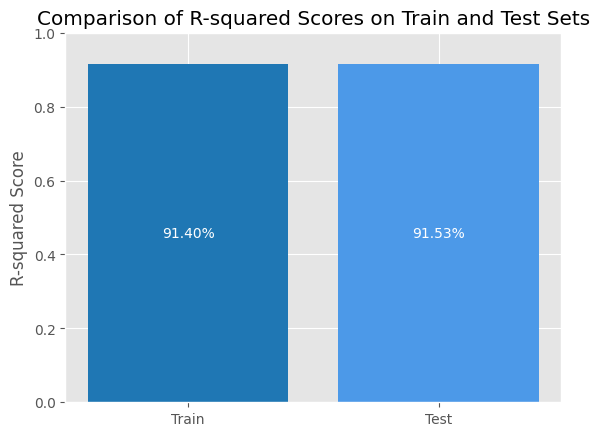

In [147]:
model = LinearRegression()
model.fit(X_train_C1, y_train_C1)


y_train_pred = model.predict(X_train_C1)
y_test_pred = model.predict(X_test_C1)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R²: {test_r2}")

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')  # Display as percentage with 2 decimal places

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

#### Linear rgression on copy2 (Min MAx scaler)

Train RMSE: 0.32631976829869014, Train R²: 0.9139663579738881
Test RMSE: 0.32400183743508476, Test R²: 0.9152603143382391


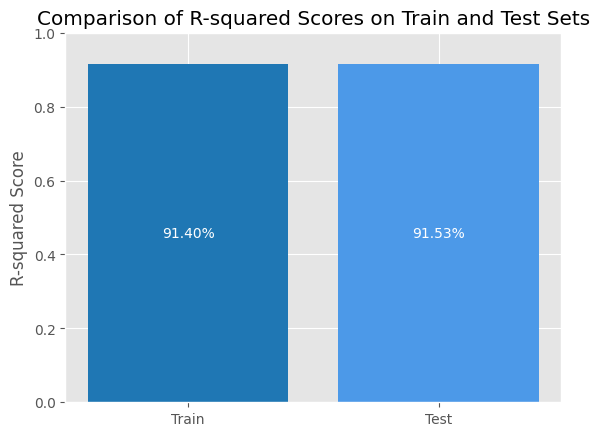

In [148]:
model = LinearRegression()
model.fit(X_train_C2, y_train_C2)


y_train_pred = model.predict(X_train_C2)
y_test_pred = model.predict(X_test_C2)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

#### linear regression on copy3 (robust scaler)

Train RMSE: 0.3263196746676806, Train R²: 0.9139664073451882
Test RMSE: 0.3240027474707902, Test R²: 0.9152598383147169


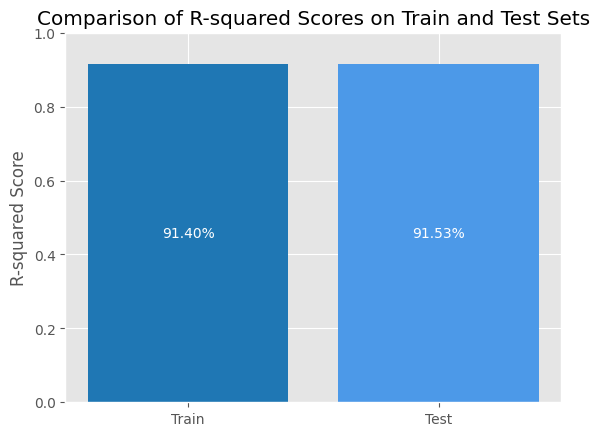

In [149]:
model = LinearRegression()
model.fit(X_train_C3, y_train_C3)


y_train_pred = model.predict(X_train_C3)
y_test_pred = model.predict(X_test_C3)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()


#### Linear Regression on PCA of copy1 (PCA on standared Scale Dataset)

Train RMSE: 0.3420760825903275, Train R²: 0.9054575265285183
Test RMSE: 0.3394859216578261, Test R²: 0.9069673396054456


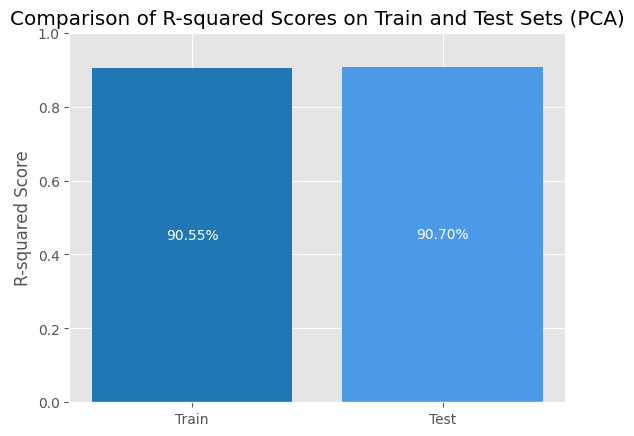

In [150]:
model = LinearRegression()
model.fit(pca_std_Train, y_train_C1)


y_train_pred = model.predict(pca_std_Train)
y_test_pred = model.predict(pca_std_Test)

train_mse = mean_squared_error(y_train_C1, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C1, y_train_pred)

test_mse = mean_squared_error(y_test_C1, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

#### linear regression on PCA of copy2 (PCA scaled in Min max scaler)

Train RMSE: 0.3636183116110624, Train R²: 0.8931749678828299
Test RMSE: 0.36210592227780786, Test R²: 0.8941567521223928


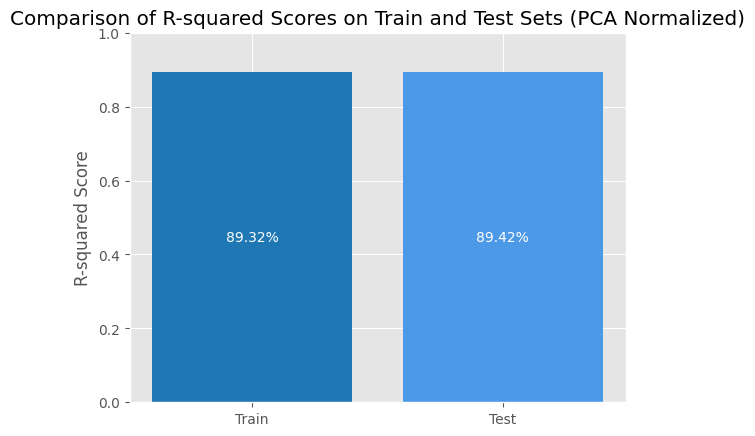

In [151]:
model = LinearRegression()
model.fit(pca_norm_Train, y_train_C2)


y_train_pred = model.predict(pca_norm_Train)
y_test_pred = model.predict(pca_norm_Test)

train_mse = mean_squared_error(y_train_C2, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C2, y_train_pred)

test_mse = mean_squared_error(y_test_C2, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C2, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA Normalized)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

#### Linear regression on PCA of copy3 (PCA scaled using Robust scaler)

Train RMSE: 0.3848375916358809, Train R²: 0.8803434391010672
Test RMSE: 0.3838563705864322, Test R²: 0.881059596423842


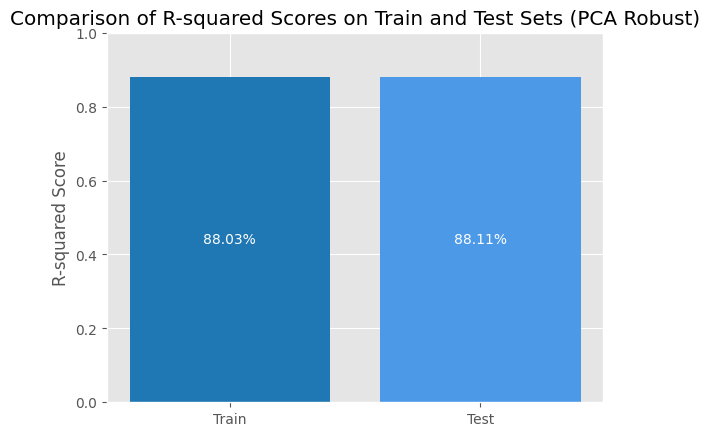

In [152]:
model = LinearRegression()
model.fit(pca_rob_Train, y_train_C3)


y_train_pred = model.predict(pca_rob_Train)
y_test_pred = model.predict(pca_rob_Test)

train_mse = mean_squared_error(y_train_C3, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C3, y_train_pred)

test_mse = mean_squared_error(y_test_C3, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C3, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA Robust)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

#### linear regression on the main dataframe without any scaling but PCA applied

Train RMSE: 1.0813356507042882, Train R²: 0.05528114485679547
Test RMSE: 1.081024769277792, Test R²: 0.056670985813313424


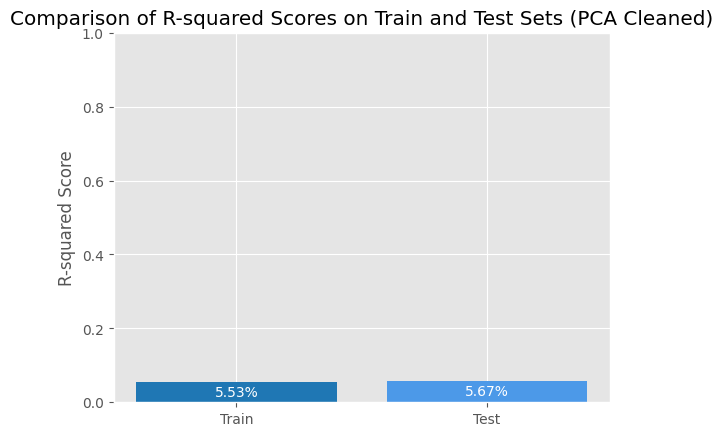

In [153]:
model = LinearRegression()
model.fit(pca_clean_Train, y_train_CL)


y_train_pred = model.predict(pca_clean_Train)
y_test_pred = model.predict(pca_clean_Test)

train_mse = mean_squared_error(y_train_CL, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_CL, y_train_pred)

test_mse = mean_squared_error(y_test_CL, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_CL, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f'Test RMSE: {test_rmse}, Test R²: {test_r2}')

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Lighter and darker shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA Cleaned)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

### Comparsion between the percentage of R2 of each approach by using Linear Regression model 

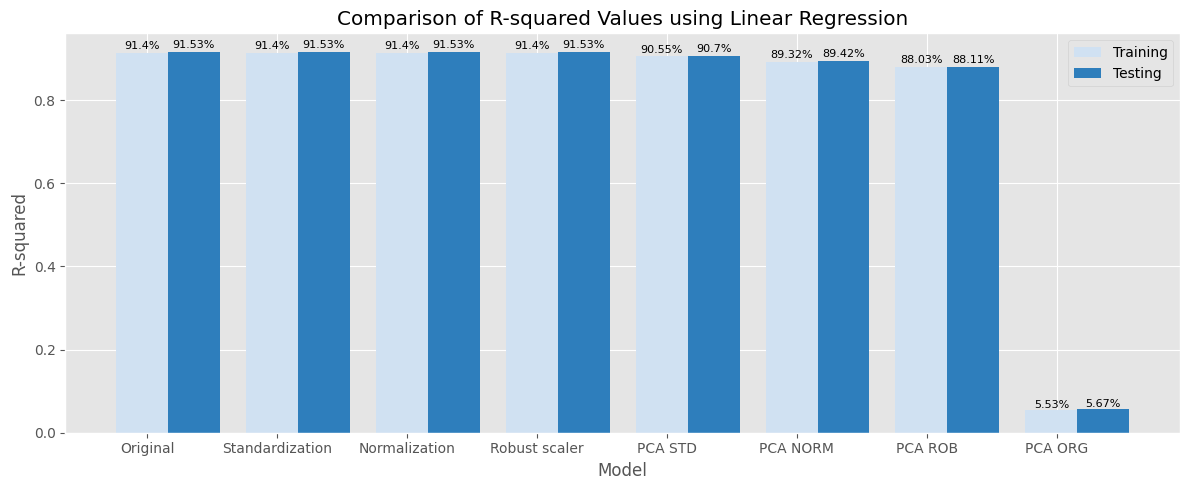

In [154]:
# R-squared values for training and testing data
r2_train = [0.91396, 0.91396, 0.91396, 0.91396, 0.90545, 0.89317, 0.88034, 0.05528]
r2_test = [0.91525, 0.91525, 0.91526, 0.91525, 0.90696, 0.89415, 0.88105, 0.05667]

# Create the bar plot
plt.figure(figsize=(12, 5))  # Increase the figure width
width = 0.40  # Width of the bars
index = range(len(r2_train))  # Indices for the x-axis

# Define a blue colormap
cmap = cm.Blues  # Choose a colormap from matplotlib.cm

# Plot the bars for training data with blue colors
rects1 = plt.bar(index, r2_train, width, label='Training', color=cmap(0.2))

# Plot the bars for testing data with blue colors
rects2 = plt.bar([x + width for x in index], r2_test, width, label='Testing', color=cmap(0.7))

# Set labels and title
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Values using Linear Regression')

# Adjust x-axis ticks
xticks_pos = [i + width * 0.1 for i in index]  # Adjust the offset value as needed
plt.xticks(xticks_pos)
ax = plt.gca()  # Get the current Axes object
ax.set_xticklabels(['Original', 'Standardization', 'Normalization', 'Robust scaler', 'PCA STD', 'PCA NORM', 'PCA ROB', 'PCA ORG'])

# Add a legend
plt.legend()

# Print percentage of R-squared on each bar
for rect, r2 in zip(rects1 + rects2, r2_train + r2_test):
    height = rect.get_height()
    # Format R-squared to percentage with two decimal places
    r2_percent = f"{round(r2 * 100, 2)}%"
    # Add a text annotation above the bar with the percentage
    ax.text(rect.get_x() + rect.get_width() / 2, 1.005 * height, r2_percent, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## **3rd: XGBoost**

#### xgboost on the cleaned_df dataset (Without any scaling or PCA)

Train RMSE: 0.1629044982859476, Train R^2: 0.9785588688385548
Test RMSE: 0.16585170279454997, Test R^2: 0.9777959717118988


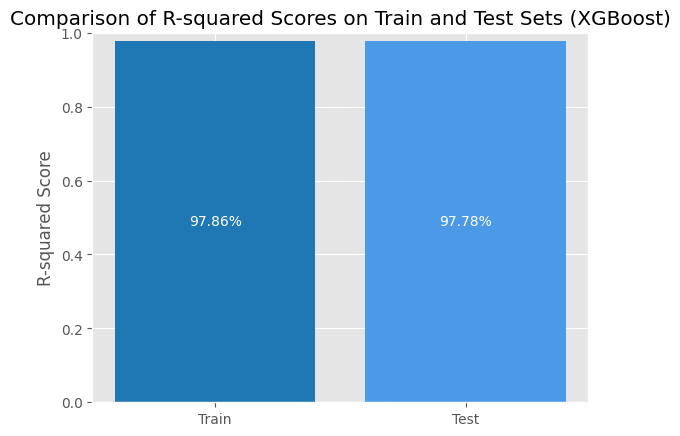

In [155]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

x = cleaned_df.drop(['price'], axis=1)
y = cleaned_df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Use XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R^2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R^2: {test_r2}")

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization
plt.show()

#### Standard Scaler for C1

Train RMSE: 0.1629044982859476, Train R2: 0.9785588688385548
Test RMSE: 0.16585170279454997, Test R2: 0.9777959717118988


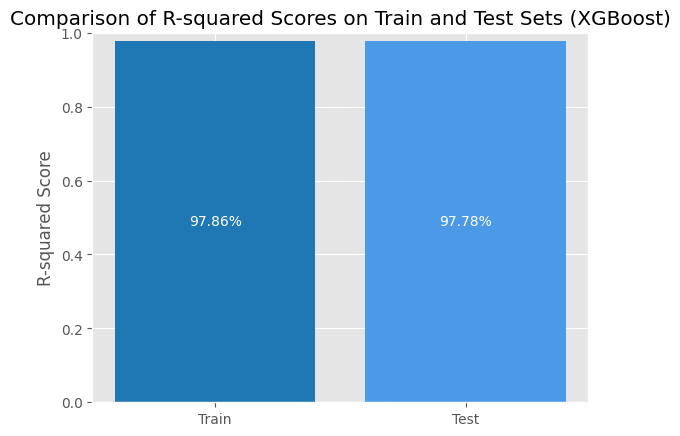

In [156]:
from xgboost import XGBRegressor
scaler = StandardScaler()
X_train_C1_scaled = scaler.fit_transform(X_train_C1)
X_test_C1_scaled = scaler.transform(X_test_C1)

# XGBoost regression for C1
model = XGBRegressor()
model.fit(X_train_C1_scaled, y_train_C1)

y_train_pred = model.predict(X_train_C1_scaled)
y_test_pred = model.predict(X_test_C1_scaled)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C1, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C1, y_train_pred)

test_mse = mean_squared_error(y_test_C1, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C1, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization
plt.show()

#### MinMax Scaler for C2


Train RMSE: 0.1629044982859476, Train R2: 0.9785588688385548
Test RMSE: 0.16585170279454997, Test R2: 0.9777959717118988


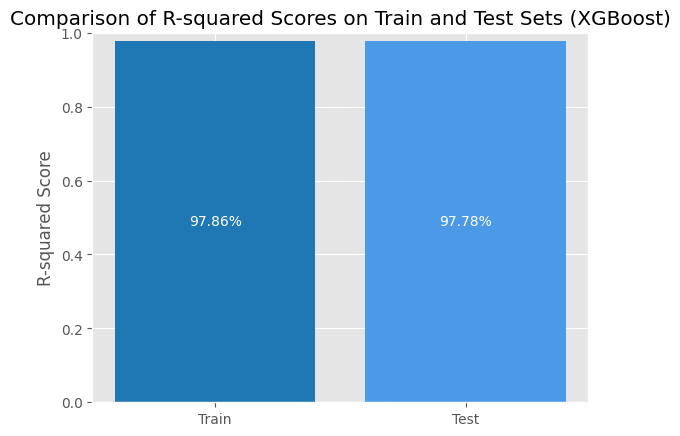

In [157]:
scaler = MinMaxScaler()
X_train_C2_scaled = scaler.fit_transform(X_train_C2)
X_test_C2_scaled = scaler.transform(X_test_C2)

# XGBoost regression for C2
model = XGBRegressor()
model.fit(X_train_C2_scaled, y_train_C2)

y_train_pred = model.predict(X_train_C2_scaled)
y_test_pred = model.predict(X_test_C2_scaled)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C2, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C2, y_train_pred)

test_mse = mean_squared_error(y_test_C2, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C2, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")
labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization
plt.show()

#### Robust Scaler for C3


Train RMSE: 0.1629044982859476, Train R2: 0.9785588688385548
Test RMSE: 0.16585170279454997, Test R2: 0.9777959717118988


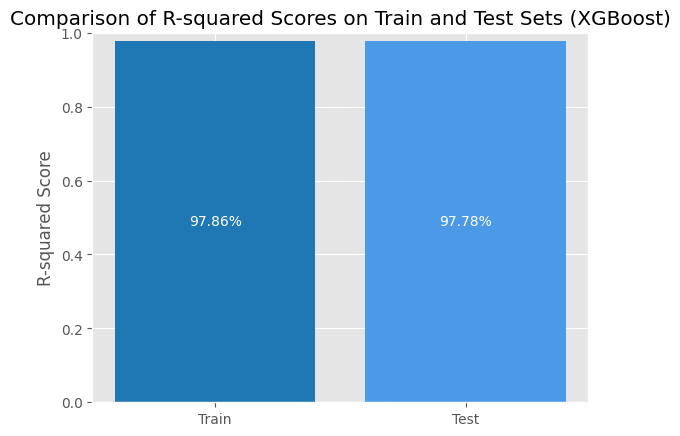

In [158]:
scaler = RobustScaler()
X_train_C3_scaled = scaler.fit_transform(X_train_C3)
X_test_C3_scaled = scaler.transform(X_test_C3)

# XGBoost regression for C3
model = XGBRegressor()
model.fit(X_train_C3_scaled, y_train_C3)

y_train_pred = model.predict(X_train_C3_scaled)
y_test_pred = model.predict(X_test_C3_scaled)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C3, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C3, y_train_pred)

test_mse = mean_squared_error(y_test_C3, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C3, y_test_pred)

print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

labels = ['Train', 'Test']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1) 
plt.show()

#### PCA of copy1 (PCA on standared Scale Dataset)

Train RMSE: 0.1920882944809087, Train R2: 0.9701885334518137
Test RMSE: 0.20339399152516305, Test R2: 0.9666060232137867


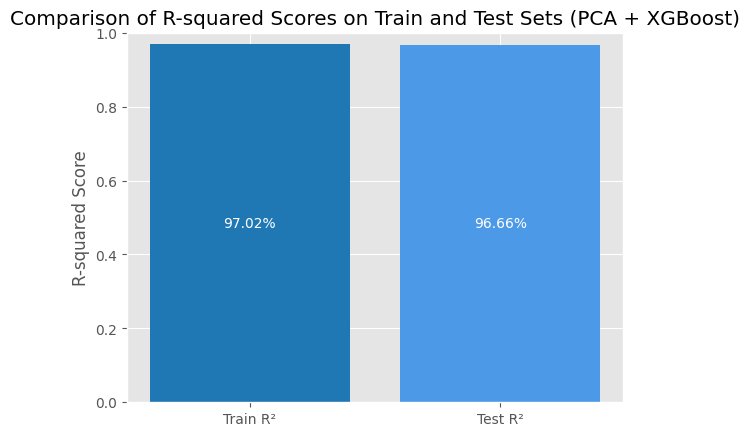

In [159]:
scaler = StandardScaler()
X_train_C1_scaled = scaler.fit_transform(X_train_C1)
X_test_C1_scaled = scaler.transform(X_test_C1)

# Apply PCA
pca = PCA(n_components=X_train_C1.shape[1])  # Assuming using all components
pca_std_Train = pca.fit_transform(X_train_C1_scaled)
pca_std_Test = pca.transform(X_test_C1_scaled)

# XGBoost regression
model = XGBRegressor()
model.fit(pca_std_Train, y_train_C1)

y_train_pred = model.predict(pca_std_Train)
y_test_pred = model.predict(pca_std_Test)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C1, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C1, y_train_pred)

test_mse = mean_squared_error(y_test_C1, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C1, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

labels = ['Train R²', 'Test R²']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA + XGBoost)')
plt.ylim(0, 1)  # Adjust the y-axis limit for better visualization

# Show the plot
plt.show()

#### PCA of copy2 (PCA scaled in Min max scaler)

Train RMSE: 0.17566853565688698, Train R2: 0.975067289036647
Test RMSE: 0.1855600674792876, Test R2: 0.9722053668729713


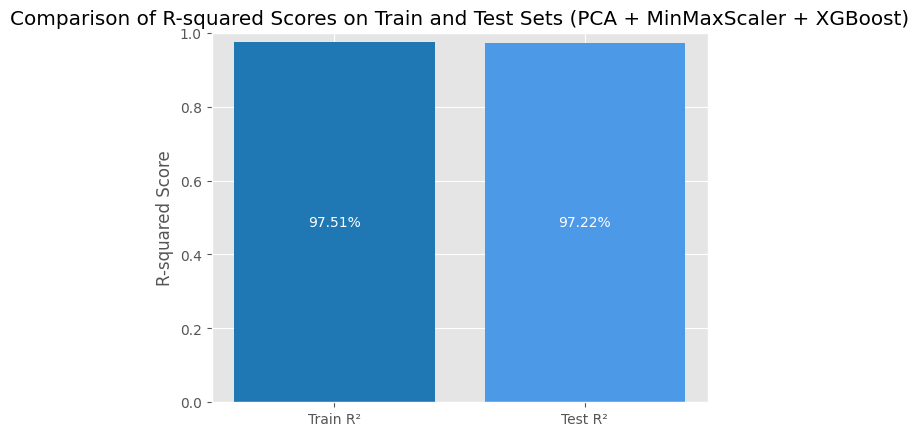

In [160]:
scaler = MinMaxScaler()
X_train_C2_scaled = scaler.fit_transform(X_train_C2)
X_test_C2_scaled = scaler.transform(X_test_C2)

# Apply PCA
pca = PCA(n_components=X_train_C2.shape[1])  # Assuming using all components
pca_minmax_Train = pca.fit_transform(X_train_C2_scaled)
pca_minmax_Test = pca.transform(X_test_C2_scaled)

# XGBoost regression
model = XGBRegressor()
model.fit(pca_minmax_Train, y_train_C2)

y_train_pred = model.predict(pca_minmax_Train)
y_test_pred = model.predict(pca_minmax_Test)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C2, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C2, y_train_pred)

test_mse = mean_squared_error(y_test_C2, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C2, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")

labels = ['Train R²', 'Test R²']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA + MinMaxScaler + XGBoost)')
plt.ylim(0, 1) 
plt.show()


#### PCA of copy3 (PCA scaled using Robust scaler)

Train RMSE: 0.16491703741430194, Train R2: 0.9780258244774581
Test RMSE: 0.1742993971334577, Test R2: 0.9754764311386853


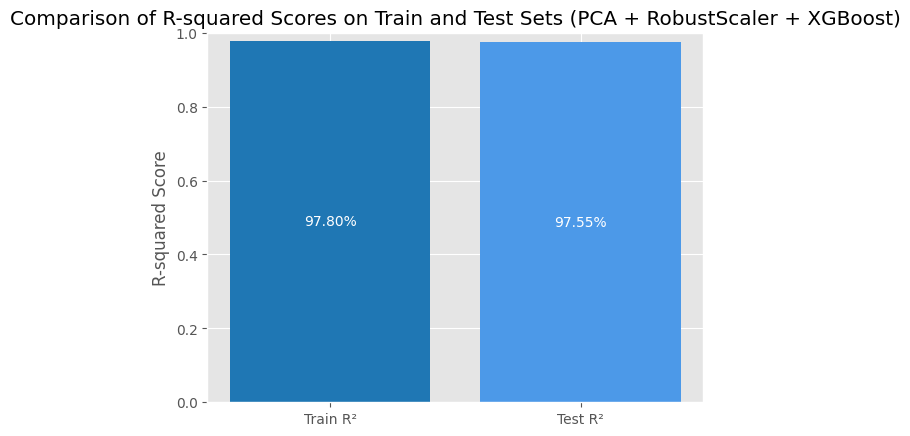

In [161]:
scaler = RobustScaler()
X_train_C3_scaled = scaler.fit_transform(X_train_C3)
X_test_C3_scaled = scaler.transform(X_test_C3)

# Apply PCA
pca = PCA(n_components=X_train_C3.shape[1])  # Assuming using all components
pca_robust_Train = pca.fit_transform(X_train_C3_scaled)
pca_robust_Test = pca.transform(X_test_C3_scaled)

# XGBoost regression
model = XGBRegressor()
model.fit(pca_robust_Train, y_train_C3)

y_train_pred = model.predict(pca_robust_Train)
y_test_pred = model.predict(pca_robust_Test)

# Train and Test Metrics
train_mse = mean_squared_error(y_train_C3, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_C3, y_train_pred)

test_mse = mean_squared_error(y_test_C3, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_C3, y_test_pred)

# Print Results
print(f"Train RMSE: {train_rmse}, Train R2: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R2: {test_r2}")
labels = ['Train R²', 'Test R²']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (PCA + RobustScaler + XGBoost)')
plt.ylim(0, 1)  
plt.show()


#### main dataframe without any scaling but PCA applied

Train RMSE: 0.962862918457332, Train R²: 0.25095059498744954
Test RMSE: 0.9634632750657672, Test R²: 0.2506887854875247


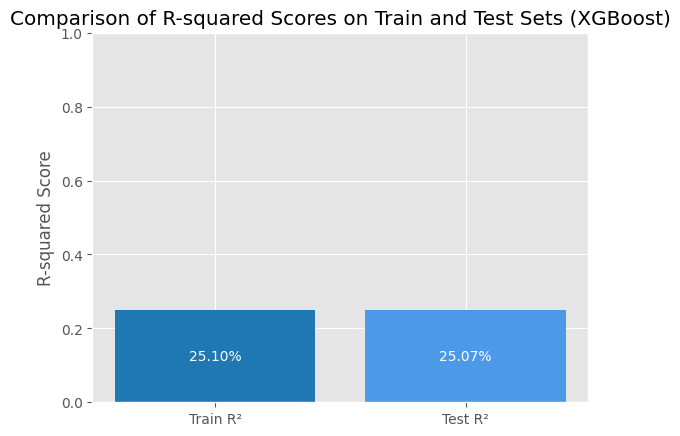

In [162]:
model = xgb.XGBRegressor()

# Fit the model
model.fit(pca_clean_Train, y_train_CL)

# Predictions
y_train_pred = model.predict(pca_clean_Train)
y_test_pred = model.predict(pca_clean_Test)

# Calculating RMSE and R^2 for training set
train_mse = mean_squared_error(y_train_CL, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_CL, y_train_pred)

# Calculating RMSE and R^2 for test set
test_mse = mean_squared_error(y_test_CL, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_CL, y_test_pred)

# Print the results
print(f"Train RMSE: {train_rmse}, Train R²: {train_r2}")
print(f"Test RMSE: {test_rmse}, Test R²: {test_r2}")
labels = ['Train R²', 'Test R²']
r2_scores = [train_r2, test_r2]

# Define colors for the bars
colors = ['#1f77b4', '#4c99e8']  # Shades of blue

# Create a bar plot
fig, ax = plt.subplots()
bars = ax.bar(labels, r2_scores, color=colors)

# Adding percentage in the middle of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval / 2, f"{yval:.2%}", ha='center', va='center', color='white')

# Adding labels and title
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores on Train and Test Sets (XGBoost)')
plt.ylim(0, 1)
plt.show()


### Comparsion between the percentage of R2 of each approach by using XGBoost model 

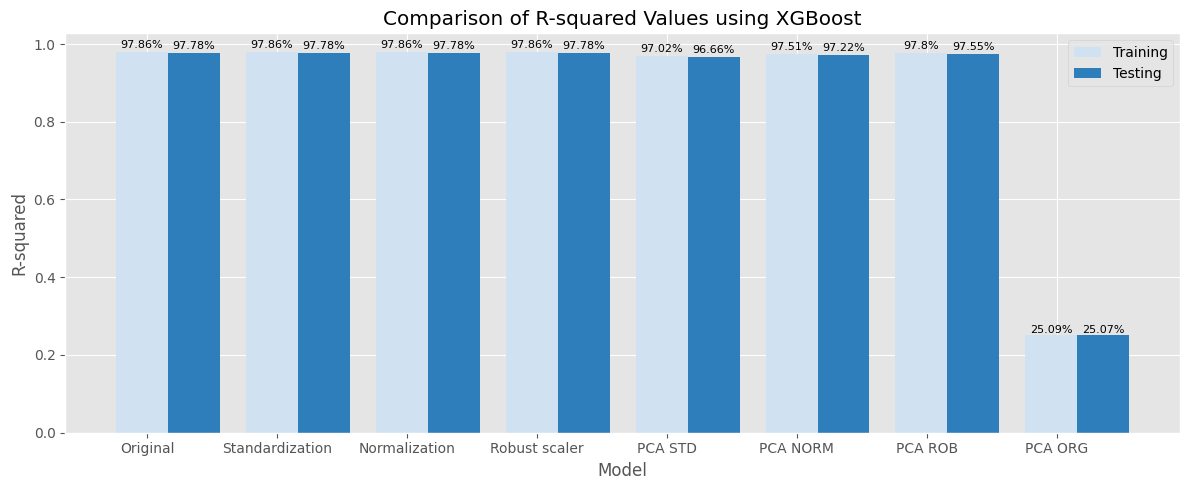

In [163]:
# R-squared values for training and testing data
r2_train = [0.97855, 0.97855, 0.97855, 0.97855, 0.97018, 0.97506, 0.97802, 0.25095]
r2_test = [0.97779, 0.97779, 0.97779, 0.97779, 0.96660, 0.97220, 0.97547, 0.25068]

# Create the bar plot
plt.figure(figsize=(12, 5))  # Increase the figure width
width = 0.40  # Width of the bars
index = range(len(r2_train))  # Indices for the x-axis

# Define a blue colormap
cmap = cm.Blues  # Choose a colormap from matplotlib.cm

# Plot the bars for training data with blue colors
rects1 = plt.bar(index, r2_train, width, label='Training', color=cmap(0.2))

# Plot the bars for testing data with blue colors
rects2 = plt.bar([x + width for x in index], r2_test, width, label='Testing', color=cmap(0.7))

# Set labels and title
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared Values using XGBoost')

# Adjust x-axis ticks
xticks_pos = [i + width * 0.1 for i in index]  # Adjust the offset value as needed
plt.xticks(xticks_pos)
ax = plt.gca()  # Get the current Axes object
ax.set_xticklabels(['Original', 'Standardization', 'Normalization', 'Robust scaler', 'PCA STD', 'PCA NORM', 'PCA ROB', 'PCA ORG'])

# Add a legend
plt.legend()

# Print percentage of R-squared on each bar
for rect, r2 in zip(rects1 + rects2, r2_train + r2_test):
    height = rect.get_height()
    # Format R-squared to percentage with two decimal places
    r2_percent = f"{round(r2 * 100, 2)}%"
    # Add a text annotation above the bar with the percentage
    ax.text(rect.get_x() + rect.get_width() / 2, 1.005 * height, r2_percent, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()